# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 



X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Importing the Libraries and reading the dataset

In [897]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#supress warnings
import warnings
warnings.filterwarnings("ignore")

# Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [898]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)

In [899]:
# Reading the dataset
df_leads = pd.read_csv(r"C:\Users\user\OneDrive\Documents\Machine Learning\Lead Scoring Case Study\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")


In [900]:
df_leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0         0.00   
1  Organic Search           No          No          0         5.00   
2  Direct Traffic           No          No          1         2.00   
3  Direct Traffic           No          No          0         1.00   
4          Google           No          No          1         2.00   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                  0.00  Page Visited on Website   
1                          674                  2.50             Email Opened   
2                         1532                  2.00             Email Opened   
3                          305                  1.00              Unreachable   
4                         1428                  1.00        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [901]:
df_leads.shape

(9240, 37)

## Data Preparation and Cleaning

In [902]:
### Data Understanding
df_leads.describe()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
count      9240.00    9240.00      9103.00                      9240.00   
mean     617188.44       0.39         3.45                       487.70   
std       23406.00       0.49         4.85                       548.02   
min      579533.00       0.00         0.00                         0.00   
25%      596484.50       0.00         1.00                        12.00   
50%      615479.00       0.00         3.00                       248.00   
75%      637387.25       1.00         5.00                       936.00   
max      660737.00       1.00       251.00                      2272.00   

       Page Views Per Visit  Asymmetrique Activity Score  \
count               9103.00                      5022.00   
mean                   2.36                        14.31   
std                    2.16                         1.39   
min                    0.00                         7.00   
25%                    1.00                        14.00   
50%                    2.00                        14.00   
75%                    3.00                        15.00   
max                   55.00                        18.00   

       Asymmetrique Profile Score  
count                     5022.00  
mean                        16.34  
std                          1.81  
min                         11.00  
25%                         15.00  
50%                         16.00  
75%                         18.00  
max                         20.00

In [903]:
# checking number of unique values in each column
df_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [904]:
## Check data types of columns and nulls
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

 There are few columns with quite a high number of missing/null values in the dataframe.


In [905]:
#Checking for count of missing values in each column
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [906]:
## Check for duplicate rows
print(df_leads.duplicated().sum())

0


There are no duplicates in the dataframe df_leads

#### Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value. Let's do data cleaning activity


In [907]:
## List of columns having 'Select' as value

cols_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [908]:
## Converting 'Select' values to NaN.
df_leads = df_leads.replace('Select', np.nan)

In [909]:
## Checking if all 'Select' values have been handled in the columns
cols_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

[]


####  there are no 'Select' values in the dataframe df_leads. Let's handle missing data

In [910]:
## Calculating Missing Values Percentage

100*(df_leads.isna().mean()).sort_values(ascending=False)

How did you hear about X Education              78.46
Lead Profile                                    74.19
Lead Quality                                    51.59
Asymmetrique Profile Score                      45.65
Asymmetrique Activity Score                     45.65
Asymmetrique Activity Index                     45.65
Asymmetrique Profile Index                      45.65
City                                            39.71
Specialization                                  36.58
Tags                                            36.29
What matters most to you in choosing a course   29.32
What is your current occupation                 29.11
Country                                         26.63
Page Views Per Visit                             1.48
TotalVisits                                      1.48
Last Activity                                    1.11
Lead Source                                      0.39
Receive More Updates About Our Courses           0.00
I agree to pay the amount th

In [911]:
### Dropping the columns having 40% and more null data
def dropNullColumns(data ,percentage=40):

    missing_perc = 100*(data.isna().mean()).sort_values(ascending=False)
    col_to_drop = missing_perc[missing_perc>=percentage].index.to_list()
    print("Total columns dropped: ",len(col_to_drop),"\n")
    print("List of columns dropped : " , col_to_drop,"\n")
    print("Shape before dropping columns: ",data.shape)

    data.drop(labels=col_to_drop,axis=1, inplace=True)

    print("Shape after dropping columns: ",data.shape)

In [912]:
## dropping columns using UDF
dropNullColumns(df_leads)

Total columns dropped:  7 

List of columns dropped :  ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index'] 

Shape before dropping columns:  (9240, 37)
Shape after dropping columns:  (9240, 30)


In [913]:
## Checking the percentage of null values for remaining columns

100*(df_leads.isna().mean()).sort_values(ascending=False)

City                                            39.71
Specialization                                  36.58
Tags                                            36.29
What matters most to you in choosing a course   29.32
What is your current occupation                 29.11
Country                                         26.63
Page Views Per Visit                             1.48
TotalVisits                                      1.48
Last Activity                                    1.11
Lead Source                                      0.39
Through Recommendations                          0.00
Receive More Updates About Our Courses           0.00
Prospect ID                                      0.00
Newspaper                                        0.00
Update me on Supply Chain Content                0.00
Get updates on DM Content                        0.00
I agree to pay the amount through cheque         0.00
A free copy of Mastering The Interview           0.00
Digital Advertisement       

### Categorical columns


In [914]:
## Select the columns with non-numeric data type
categorical_cols = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()
print(categorical_cols)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [915]:
### Check the categorical column data and remove the missing values
columnsList= ["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']

for i in columnsList:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("___"*40,"\n")

value_counts % for : City 

Mumbai                        57.84
Thane & Outskirts             13.50
Other Cities                  12.31
Other Cities of Maharashtra    8.20
Other Metro Cities             6.82
Tier II Cities                 1.33
Name: City, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Specialization 

Finance Management                  16.66
Human Resource Management           14.47
Marketing Management                14.30
Operations Management                8.58
Business Administration              6.88
IT Projects Management               6.25
Supply Chain Management              5.96
Banking, Investment And Insurance    5.77
Travel and Tourism                   3.46
Media and Advertising                3.46
International Business               3.04
Healthcare Management                2.71
Hospitality Management               1.95
E-COMMERCE          

### Categorical data analysis and insights:

#### City: City has 39.71 % missing values. Imputing missing values with Mumbai will make the data more skewed. Skewness will later cause bias in the model. Hence City column can be dropped.

#### Specialization: Specialization has 36.58 % missing values. The specialization selected is evenly distributed. Hence imputation or dropping is not a good choice. We need to create additional category called 'Others'.

#### Tags: Tags has 36.29 % missing values. Tags are assigned to customers indicating the current status of the lead. Since this is current status, this column will not be useful for modeling. Hence it can be dropped.

#### What matters most to you in choosing a course: This variable has 29.32 % missing values. 99.95% customers have selected 'better career prospects'. This is massively skewed and will not provide any insight.

#### What is your current occupation: We can impute the missing values with 'Unemployed' as it has the most values. This seems to be a important variable from business context, since X Education sells online courses and unemployed people might take this course to increase their chances of getting employed.

#### Country: X Education sells online courses and appx 96% of the customers are from India. Does not make business sense right now to impute missing values with India. Hence 'Country' column can be dropped.

#### Last Activity: "Email Opened" is having highest number of values and overall missing values in this column is just 1.11%, hence we will impute the missing values with label 'Email Opened'.

#### Lead Source: "Google" is having highest number of occurences and overall nulls in this column is just 0.39%, hence we will impute the missing values with label 'Google'

In [916]:
### Dropping the columns : 'City', 'Tags', 'Country', 'What matters most to you in choosing a course'

## Dropping Columns
print("Before Drop",df_leads.shape)
df_leads.drop(['City','Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)
print("After Drop",df_leads.shape)

Before Drop (9240, 30)
After Drop (9240, 26)


In [917]:
## Imputing values as per the above observations/insights

missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
df_leads=df_leads.fillna(value=missing_values)

In [918]:
## Re Checking the percentage of null values for remaining columns

round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending=False)

TotalVisits                                1.48
Page Views Per Visit                       1.48
Prospect ID                                0.00
Magazine                                   0.00
A free copy of Mastering The Interview     0.00
I agree to pay the amount through cheque   0.00
Get updates on DM Content                  0.00
Update me on Supply Chain Content          0.00
Receive More Updates About Our Courses     0.00
Through Recommendations                    0.00
Digital Advertisement                      0.00
Newspaper                                  0.00
X Education Forums                         0.00
Newspaper Article                          0.00
Search                                     0.00
Lead Number                                0.00
What is your current occupation            0.00
Specialization                             0.00
Last Activity                              0.00
Total Time Spent on Website                0.00
Converted                               

In [919]:
## Check TotalVisits
print("TotalVisits - Value Counts")
print("----------------------------------------")
df_leads.TotalVisits.value_counts().head(10)

TotalVisits - Value Counts
----------------------------------------


0.00    2189
2.00    1680
3.00    1306
4.00    1120
5.00     783
6.00     466
1.00     395
7.00     309
8.00     224
9.00     164
Name: TotalVisits, dtype: int64

In [920]:
# TotalVisits missing values to be imputed with mode
df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].mode()[0], inplace=True)

In [921]:
## Page Views Per Visit
print("Page Views Per Visit - Value Counts")
print("----------------------------------------")
df_leads.TotalVisits.value_counts().head(10)

Page Views Per Visit - Value Counts
----------------------------------------


0.00    2326
2.00    1680
3.00    1306
4.00    1120
5.00     783
6.00     466
1.00     395
7.00     309
8.00     224
9.00     164
Name: TotalVisits, dtype: int64

In [922]:
## Page Views Per Visit missing values to be imputed with mode
df_leads['Page Views Per Visit'].fillna(df_leads['Page Views Per Visit'].mode()[0], inplace=True)

In [923]:
## Re Checking the percentage of null values after handling categorical and numerical columns
round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending=False)

Prospect ID                                0.00
Lead Number                                0.00
A free copy of Mastering The Interview     0.00
I agree to pay the amount through cheque   0.00
Get updates on DM Content                  0.00
Update me on Supply Chain Content          0.00
Receive More Updates About Our Courses     0.00
Through Recommendations                    0.00
Digital Advertisement                      0.00
Newspaper                                  0.00
X Education Forums                         0.00
Newspaper Article                          0.00
Magazine                                   0.00
Search                                     0.00
What is your current occupation            0.00
Specialization                             0.00
Last Activity                              0.00
Page Views Per Visit                       0.00
Total Time Spent on Website                0.00
TotalVisits                                0.00
Converted                               

#### Let's remove unawanted columns


In [924]:
## Last Notable Activity
print("Last Notable Activity")
print("----------------------------------------")
100*df_leads['Last Notable Activity'].value_counts(normalize=True)

Last Notable Activity
----------------------------------------


Modified                       36.87
Email Opened                   30.60
SMS Sent                       23.51
Page Visited on Website         3.44
Olark Chat Conversation         1.98
Email Link Clicked              1.87
Email Bounced                   0.65
Unsubscribed                    0.51
Unreachable                     0.35
Had a Phone Conversation        0.15
Email Marked Spam               0.02
Approached upfront              0.01
Resubscribed to emails          0.01
View in browser link Clicked    0.01
Form Submitted on Website       0.01
Email Received                  0.01
Name: Last Notable Activity, dtype: float64

In [925]:
## check for columns with one unique value, count and freq is same
df_leads.describe(include = 'object')

Prospect ID              Lead Origin  \
count                                   9240                     9240   
unique                                  9240                        5   
top     7927b2df-8bba-4d29-b9a2-b6e0beafe620  Landing Page Submission   
freq                                       1                     4886   

       Lead Source Do Not Email Do Not Call Last Activity Specialization  \
count         9240         9240        9240          9240           9240   
unique          21            2           2            17             19   
top         Google           No          No  Email Opened         Others   
freq          2904         8506        9238          3540           3380   

       What is your current occupation Search Magazine Newspaper Article  \
count                             9240   9240     9240              9240   
unique                               6      2        1                 2   
top                         Unemployed     No       No                No   
freq                              8290   9226     9240              9238   

       X Education Forums Newspaper Digital Advertisement  \
count                9240      9240                  9240   
unique                  2         2                     2   
top                    No        No                    No   
freq                 9239      9239                  9236   

       Through Recommendations Receive More Updates About Our Courses  \
count                     9240                                   9240   
unique                       2                                      1   
top                         No                                     No   
freq                      9233                                   9240   

       Update me on Supply Chain Content Get updates on DM Content  \
count                               9240                      9240   
unique                                 1                         1   
top                                   No                        No   
freq                                9240                      9240   

       I agree to pay the amount through cheque  \
count                                      9240   
unique                                        1   
top                                          No   
freq                                       9240   

       A free copy of Mastering The Interview Last Notable Activity  
count                                    9240                  9240  
unique                                      2                    16  
top                                        No              Modified  
freq                                     6352                  3407

#### Following columns have only one unique value: 'I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses','Magazine'
#### These columns are of no use as they have only one category of response from customer and can be dropped.


In [926]:
## List of columns with one unique value whose count and frequency are same, we will drop these columns
cols_to_drop = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']

print("Before Dropping Columns",df_leads.shape)
df_leads.drop(cols_to_drop, axis = 1, inplace = True)
print("After Dropping Columns",df_leads.shape)

Before Dropping Columns (9240, 26)
After Dropping Columns (9240, 21)


#### Columns such as:'Prospect ID', 'Last Notable Activity'.
#### Above columns do not add any value to the model. Dropping these columns will remove unnecessary data from the dataframe.



In [927]:
## Dropping Columns
print("Before Dropping Columns",df_leads.shape)
df_leads.drop(['Prospect ID','Last Notable Activity'],axis=1,inplace=True)
print("After Dropping Columns",df_leads.shape)

Before Dropping Columns (9240, 21)
After Dropping Columns (9240, 19)


In [928]:
## percentage of missing values in each row,output in descending order so high value will come on top
100*(df_leads.isna().mean(axis=1)).sort_values(ascending=False).head(10)

0      0.00
6064   0.00
6156   0.00
6157   0.00
6158   0.00
6159   0.00
6160   0.00
6161   0.00
6162   0.00
6163   0.00
dtype: float64

### Checking skewness in categorical varibales


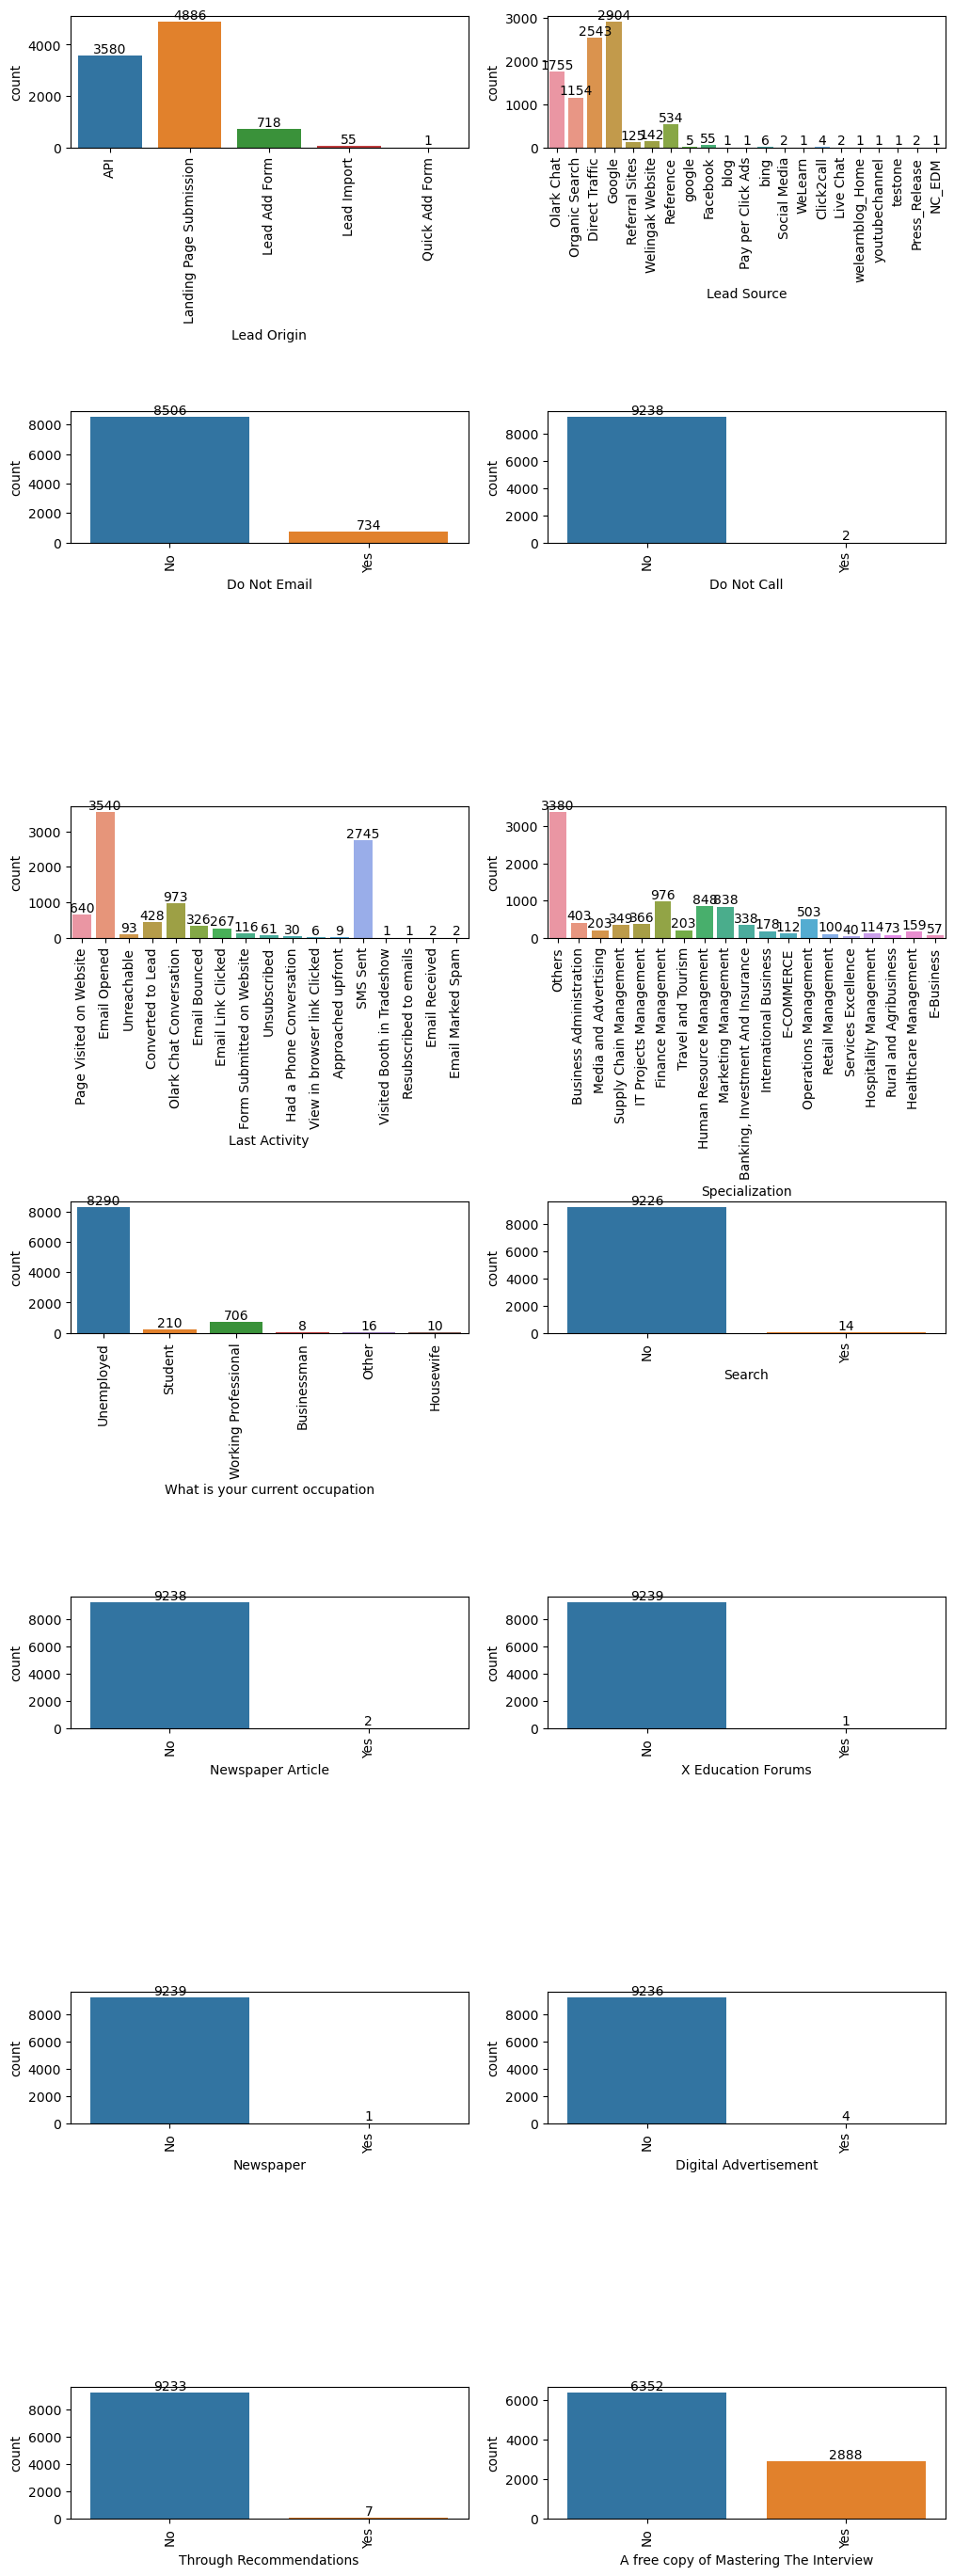

In [929]:
## plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=df_leads)
    plt.xticks(rotation=90)

    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.show()

####  Following columns have data which is highly skewed : 'Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'.
#### Hence these columns will be dropped as they will not add any value to the model.
#### Morever, Skewed variables can affect the performance of logistic regression models, as they can lead to biased or inaccurate parameter estimates.

In [930]:
## Let's drop columns having high skewned values
print("Before Drop: ",df_leads.shape)
df_leads.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",df_leads.shape)

Before Drop:  (9240, 19)
After Drop:  (9240, 12)


In [931]:
df_leads.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0         0.00                            0                  0.00   
1          0         5.00                          674                  2.50   
2          1         2.00                         1532                  2.00   
3          0         1.00                          305                  1.00   
4          1         2.00                         1428                  1.00   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

### Now, that the data is cleaned, lets standardised the data


In [932]:
### Outlier analysis for numeric variables
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = df_leads[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

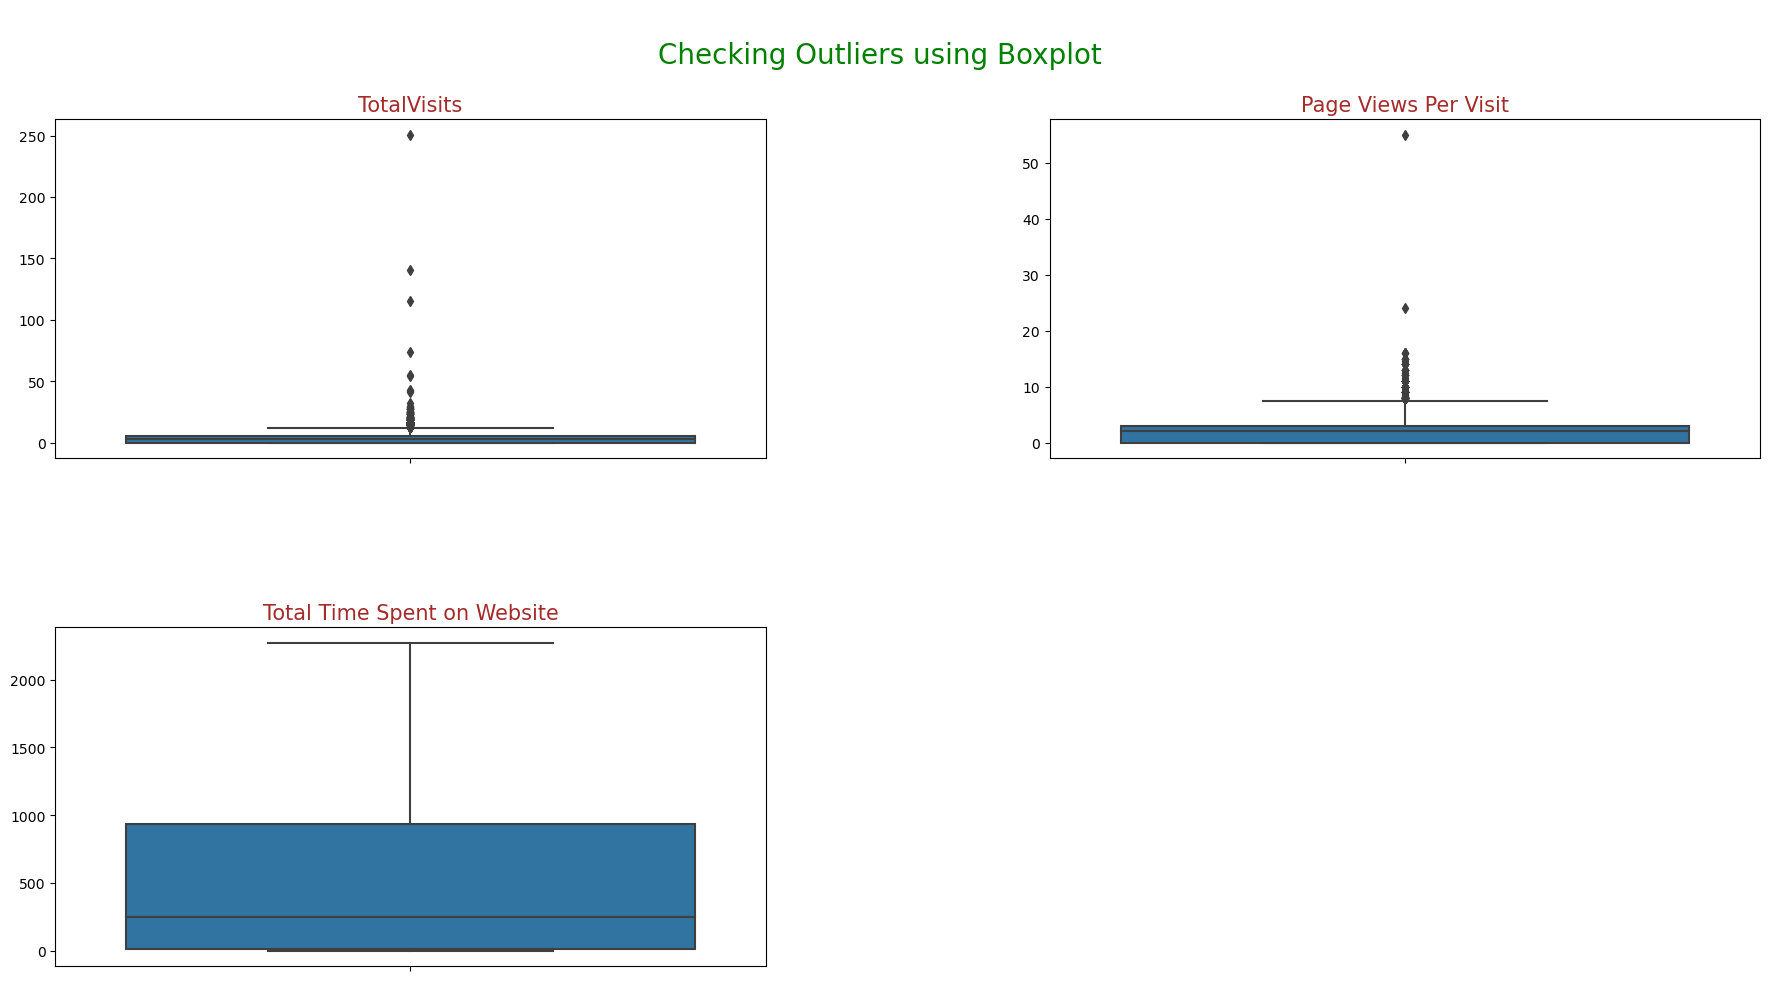

In [933]:
## Checking outliers for numerical variables other than target variable
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]
Check_Outliers(df_leads,num_cols)

#### "TotalVisits","Page Views Per Visit": These variables contain outliers as can be seen in the boxplot So, These outliers needs to be treated for these variables

In [934]:
# Before Outlier treatment
df_leads.describe(percentiles=[.10,.25,.50,.75,.95])

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
count      9240.00    9240.00      9240.00                      9240.00   
mean     617188.44       0.39         3.39                       487.70   
std       23406.00       0.49         4.84                       548.02   
min      579533.00       0.00         0.00                         0.00   
10%      586361.70       0.00         0.00                         0.00   
25%      596484.50       0.00         0.00                        12.00   
50%      615479.00       0.00         3.00                       248.00   
75%      637387.25       1.00         5.00                       936.00   
95%      655404.05       1.00        10.00                      1562.00   
max      660737.00       1.00       251.00                      2272.00   

       Page Views Per Visit  
count               9240.00  
mean                   2.33  
std                    2.16  
min                    0.00  
10%                    0.00  
25%                    0.00  
50%                    2.00  
75%                    3.00  
95%                    6.00  
max                   55.00

In [935]:
## Defining UDF to treat outliers via capping and flooring

def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])

In [936]:
## Checking outliers for numerical variables other than target variable
capping_cols = ["TotalVisits","Page Views Per Visit"]
Outlier_treatment(df_leads,capping_cols)

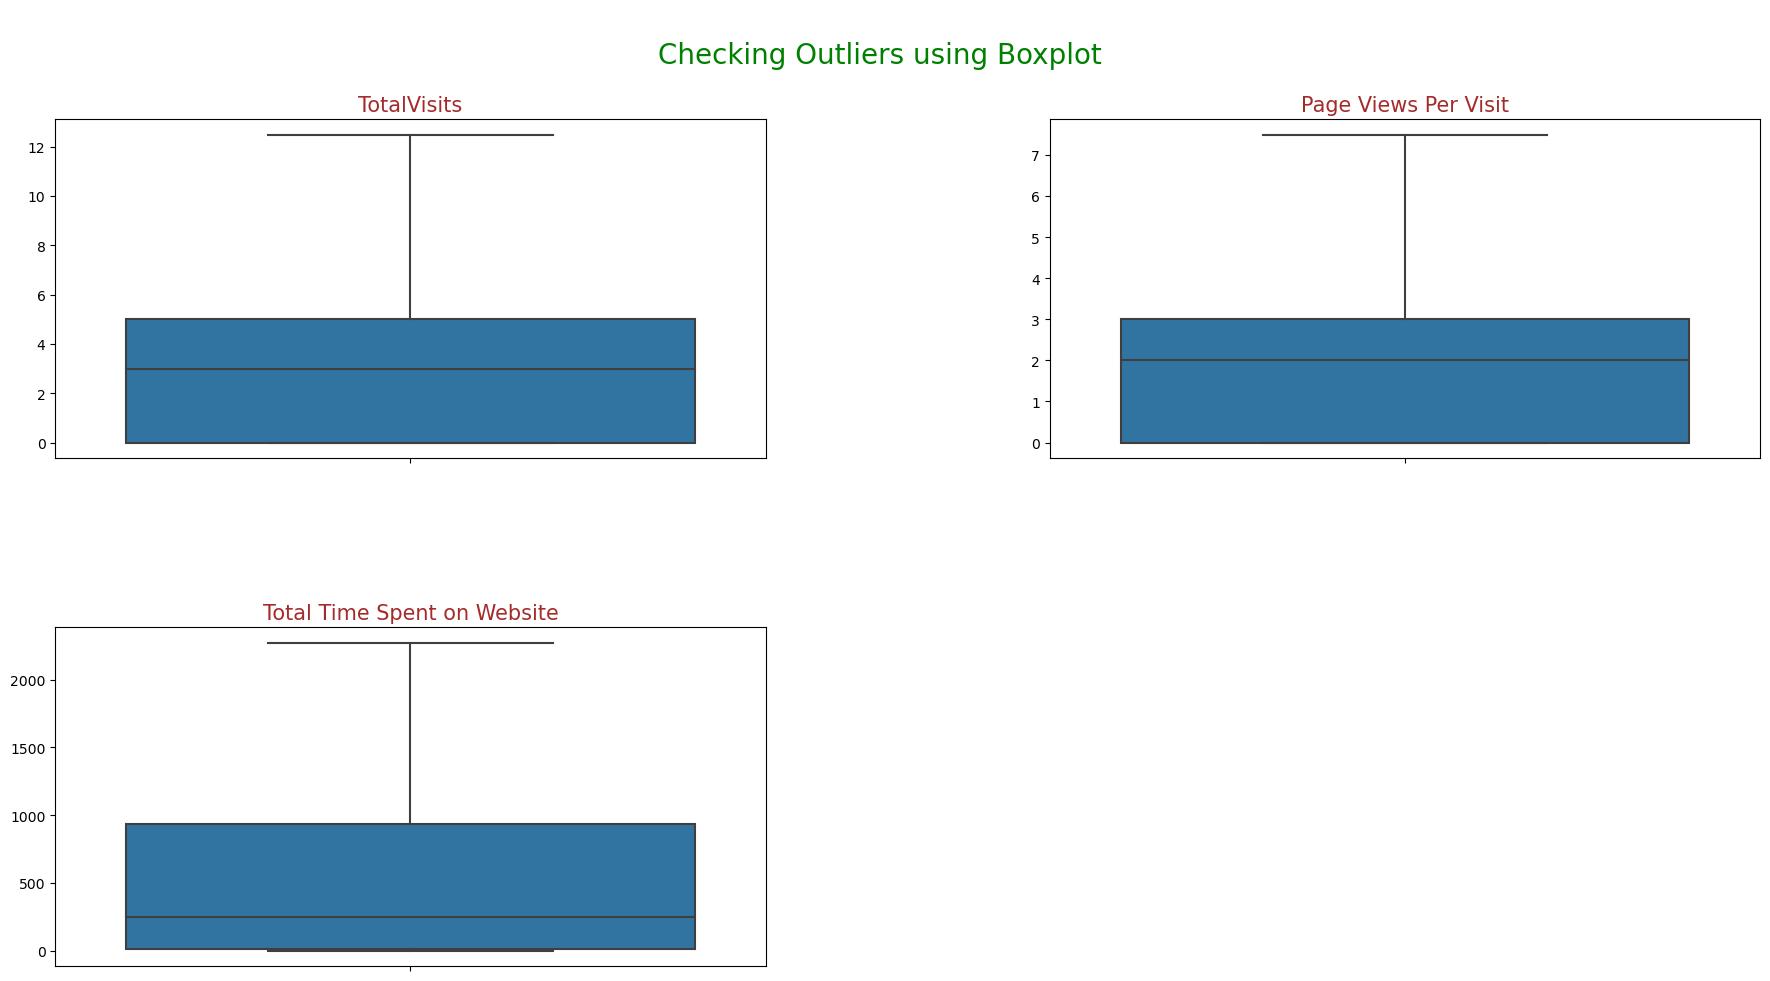

In [937]:
## Checking Boxplot after Outlier Treatment

num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]
Check_Outliers(df_leads,num_cols)

In [938]:
## After outlier treatment detailed percentile values
df_leads.describe(percentiles=[.10,.25,.50,.75,.95])

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
count      9240.00    9240.00      9240.00                      9240.00   
mean     617188.44       0.39         3.21                       487.70   
std       23406.00       0.49         3.01                       548.02   
min      579533.00       0.00         0.00                         0.00   
10%      586361.70       0.00         0.00                         0.00   
25%      596484.50       0.00         0.00                        12.00   
50%      615479.00       0.00         3.00                       248.00   
75%      637387.25       1.00         5.00                       936.00   
95%      655404.05       1.00        10.00                      1562.00   
max      660737.00       1.00        12.50                      2272.00   

       Page Views Per Visit  
count               9240.00  
mean                   2.27  
std                    1.92  
min                    0.00  
10%                    0.00  
25%                    0.00  
50%                    2.00  
75%                    3.00  
95%                    6.00  
max                    7.50

### Fixing Invalid values & Standardising Data in columns, Checking if entries in data are in correct format, datatypes are correct or not


In [939]:
df_leads.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0         0.00                            0                  0.00   
1          0         5.00                          674                  2.50   
2          1         2.00                         1532                  2.00   
3          0         1.00                          305                  1.00   
4          1         2.00                         1428                  1.00   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

In [940]:
## Categorical Variables

columnsList_cat = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview"]

for i in columnsList_cat:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("_^_"*40,"\n")

value_counts % for : Lead Origin 

Landing Page Submission   52.88
API                       38.74
Lead Add Form              7.77
Lead Import                0.60
Quick Add Form             0.01
Name: Lead Origin, dtype: float64 

_^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^_ 

value_counts % for : Lead Source 

Google              31.43
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Facebook             0.60
bing                 0.06
google               0.05
Click2call           0.04
Press_Release        0.02
Social Media         0.02
Live Chat            0.02
youtubechannel       0.01
testone              0.01
Pay per Click Ads    0.01
welearnblog_Home     0.01
WeLearn              0.01
blog                 0.01
NC_EDM               0.01
Name: Lead Source, dtype: float64 

_^__^__^__^__^__^__^__^__^__^

#### We've noticed that some categories/levels in the "Lead Score" and "Last Activity" columns have very few records. To prevent ending up with a bunch of unnecessary columns when we create dummy variables, we're planning to group these categories together under "Others".
#### Also we can see "Google" & "google" are same in "Lead Source", so we will standardise the case.

In [941]:
## Grouping low frequency value levels to Others
df_leads['Lead Source'] = df_leads['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

## Changing google to Google
df_leads['Lead Source'] = df_leads['Lead Source'].replace("google","Google")

In [942]:
# value_counts percentage after replace
df_leads["Lead Source"].value_counts(normalize=True)*100

Google             31.48
Direct Traffic     27.52
Olark Chat         18.99
Organic Search     12.49
Reference           5.78
Welingak Website    1.54
Referral Sites      1.35
Facebook            0.60
Others              0.25
Name: Lead Source, dtype: float64

In [943]:
## Grouping low frequency value levels to Others
df_leads['Last Activity'] = df_leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation',
                                                               'Approached upfront',
                                                               'View in browser link Clicked',
                                                               'Email Marked Spam',
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [944]:
## value_counts percentage after replace
df_leads['Last Activity'].value_counts(normalize=True)*100

Email Opened                38.31
SMS Sent                    29.71
Olark Chat Conversation     10.53
Page Visited on Website      6.93
Converted to Lead            4.63
Email Bounced                3.53
Email Link Clicked           2.89
Others                       2.22
Form Submitted on Website    1.26
Name: Last Activity, dtype: float64

In [945]:
## Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"
df_leads.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

## Renaming column name to "Current_occupation" from "What is your current occupationA free copy of Mastering The Interview"
df_leads.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)

In [946]:
### "Do Not Email" & "Free_copy" both are binary categorical columns lets map both of them yes/no to 1/0
## Mapping binary categorical variables (Yes/No to 1/0)
df_leads['Do Not Email'] = df_leads['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

df_leads['Free_copy'] = df_leads['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

In [947]:
## Check datatypes of the variables
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Number                  9240 non-null   int64  
 1   Lead Origin                  9240 non-null   object 
 2   Lead Source                  9240 non-null   object 
 3   Do Not Email                 9240 non-null   int64  
 4   Converted                    9240 non-null   int64  
 5   TotalVisits                  9240 non-null   float64
 6   Total Time Spent on Website  9240 non-null   int64  
 7   Page Views Per Visit         9240 non-null   float64
 8   Last Activity                9240 non-null   object 
 9   Specialization               9240 non-null   object 
 10  Current_occupation           9240 non-null   object 
 11  Free_copy                    9240 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 866.4+ KB


####  The data types appear to be suitable and no modifications are necessary

### Let's do EDA. Checking if Data is Imbalanced or not
#### Data is imbalance when one value is present in majority and other is in minority meaning an uneven distribution of observations in dataset
#### Data imbalance is in the context of Target variable only
#### Target variable is 'Converted' which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted


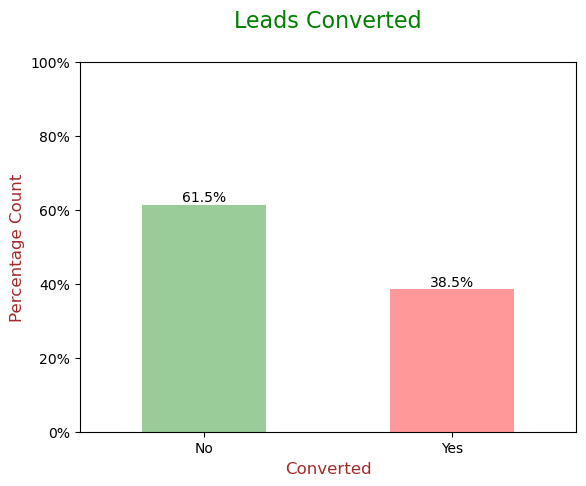

In [948]:

## ploting the results on bar plot

ax=(100*df_leads["Converted"].value_counts(normalize=True)).plot.bar(color=["Green","Red"],alpha=0.4)

## Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Green'})


## Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

## modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks]
plt.yticks(ticks,labels)

## xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

#### Conversion rate is of 38.5%, meaning only 38.5% of the people have converted to leads.(Minority)
#### While 61.5% of the people didnt convert to leads. (Majority)

In [949]:
### Ratio of Data Imbalance
ratio=(df_leads["Converted"].value_counts(normalize=True).loc[0])/(df_leads["Converted"].value_counts(normalize=True).loc[1])

print("Data Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio : 1.59 : 1


### UNIVARIATE ANALYSIS


In [950]:
df_leads.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0         0.00                            0                  0.00   
1          0         5.00                          674                  2.50   
2          1         2.00                         1532                  2.00   
3          0         1.00                          305                  1.00   
4          1         2.00                         1428                  1.00   

             Last Activity           Specialization Current_occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

   Free_copy  
0          0  
1          0  
2          1  
3          0  
4          0

In [951]:
#List of categorical columns
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Free_copy","Lead Source","Last Activity","Specialization"]

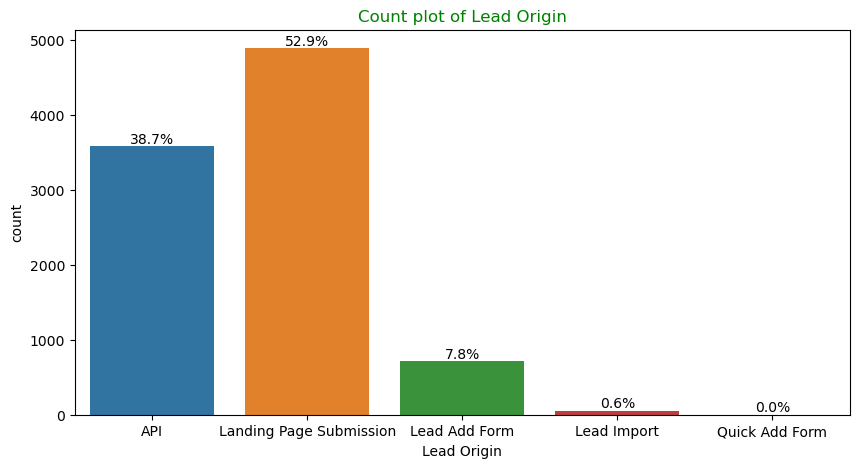

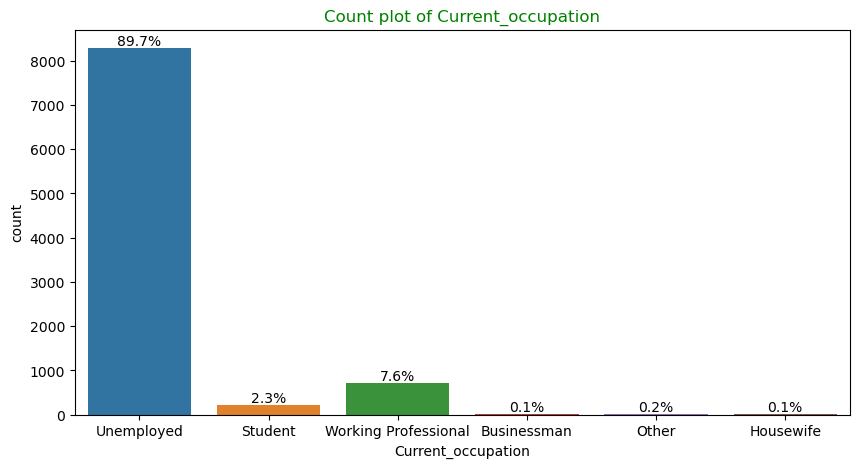

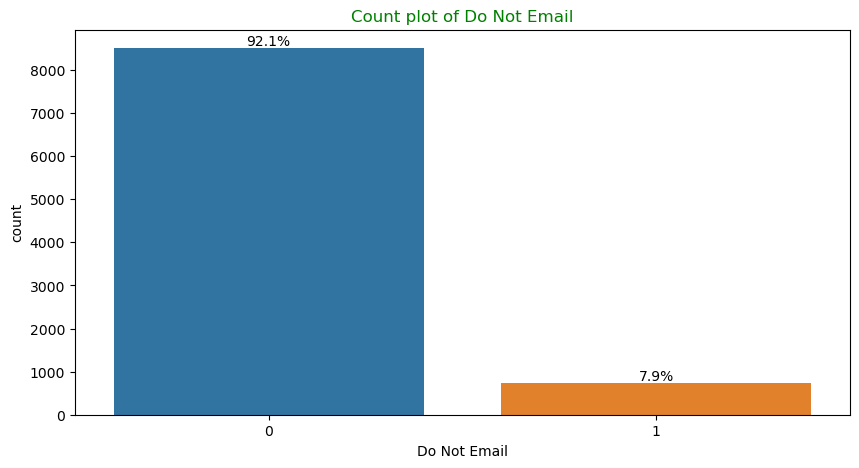

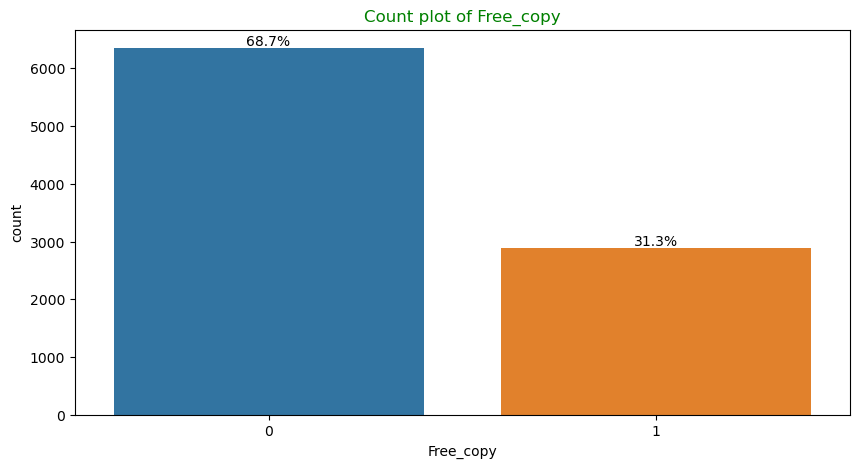

In [952]:
# countplot of columns with its value_counts percentage as annotation
for i in cat_cols[:4]:

    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df_leads)
    total=len(df_leads[i])
    plt.xticks(rotation=0)

    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


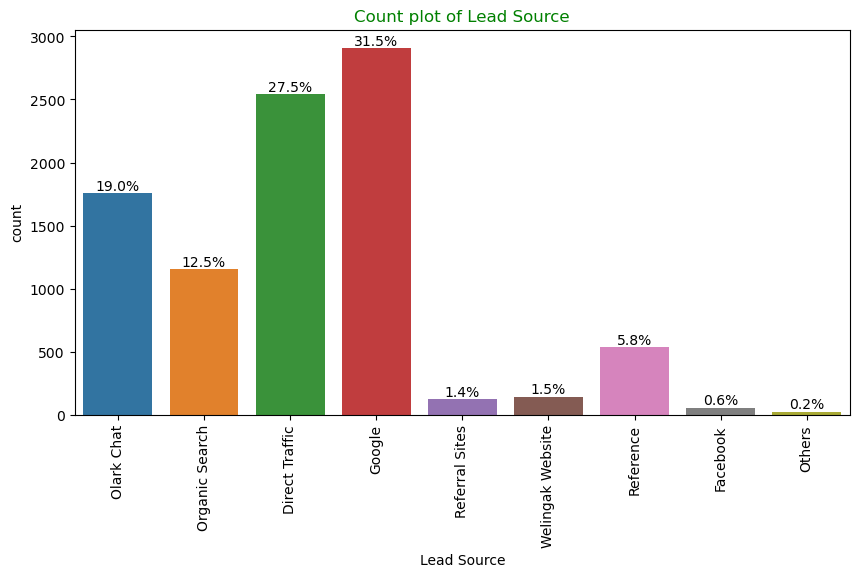

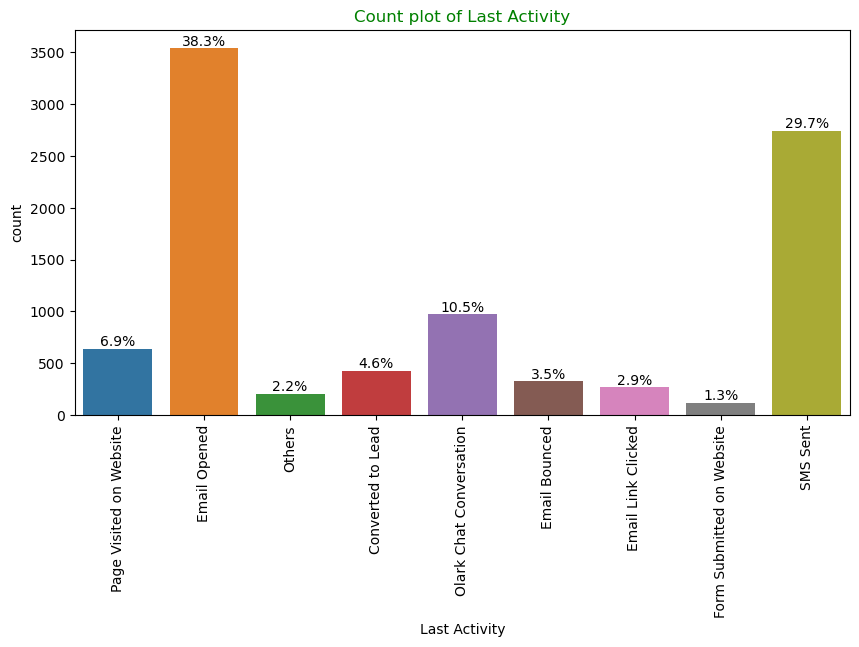

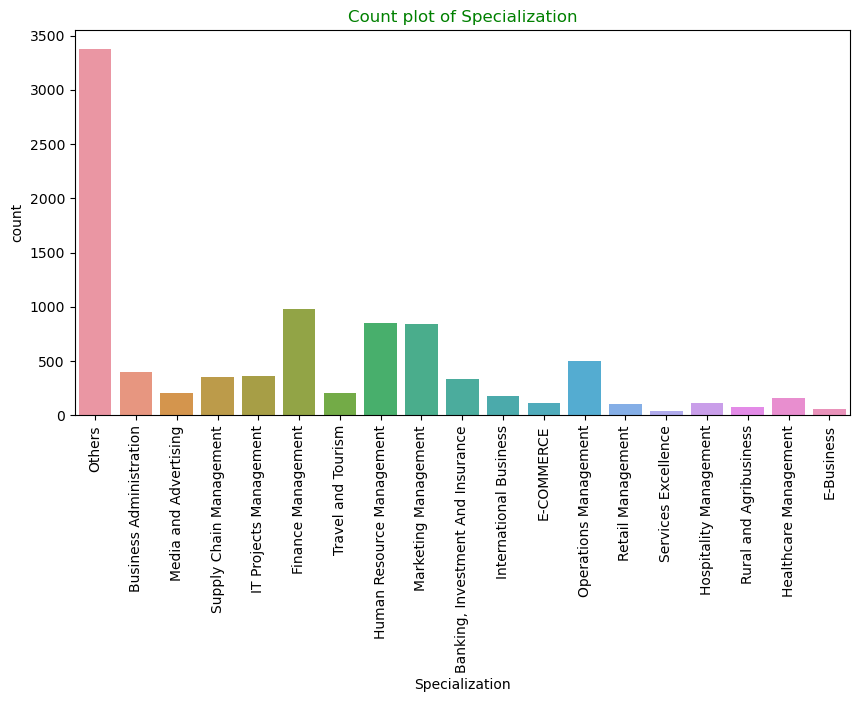

In [953]:
## Barplot for remaining columns from cat_cols (Did separate to rotate xticks 90* so labels doesnt become messy)
for i in cat_cols[4:]:

    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df_leads)
    total=len(df_leads[i])
    plt.xticks(rotation=90)


    if i!="Specialization":        # (not doing for Specialization xtick labels will be messy)
        for p in ax.patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    else:
        pass

#### In Categorical Univariate Analysis we get to know the value counts percentage in each variable that how much is the distribution of values in each column.

#### Features from variables which are present in majority (Converted and Not Converted included)
#### Lead Origin: "Landing Page Submission" identified 53% customers, "API" identified 39%.

#### Current_occupation: It has 90% of the customers as Unemployed

#### Do Not Email: 92% of the people has opted that they dont want to be emailed about the course.

#### Lead Source: 58% Lead source is from Google & Direct Traffic combined

#### Last Activity: 68% of customers contribution in SMS Sent & Email Opened activities

### BIVARIATE ANALYSIS for categorical variables
#### UDF "Bivariate_cat" tells comparision between Actual Distribution (value_count percentage) from the data and
#### 2nd graph tell the Lead Conversion Rate in percentage (how much leads are converted from 1st plot distribution)

In [954]:


def Bivariate_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name),color="Brown", fontsize=18)

    # 1st plot in subplot
    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=df_leads,palette="prism_r",alpha=0.46)

    total=len(df_leads[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")

    # Annotation for 1st plot
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    # 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of {}".format(variable_name),color="green",fontsize=12)
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="BuGn",alpha=0.85)

    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")

    # Annotation for 2nd plot
    # Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

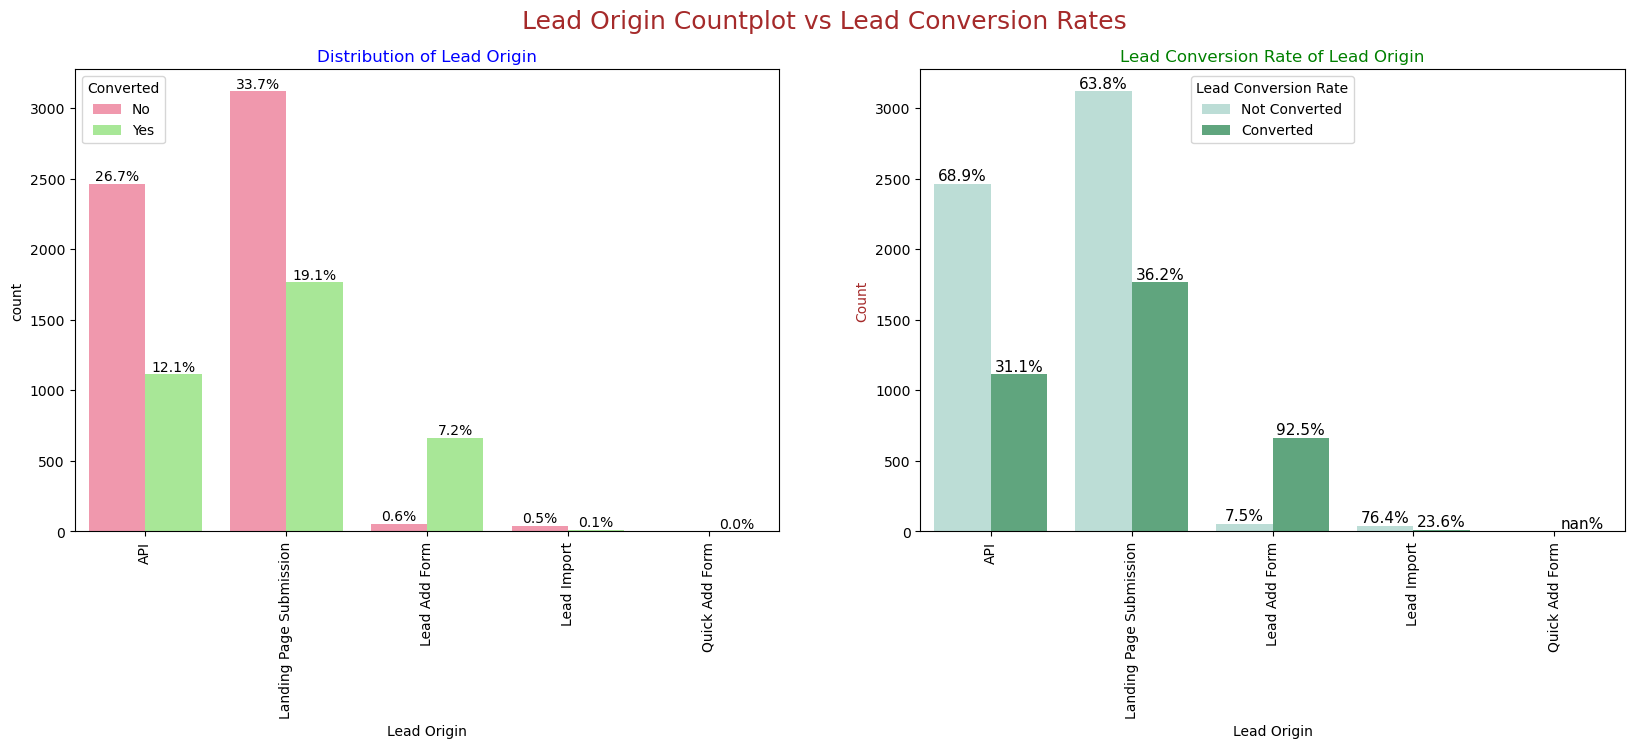

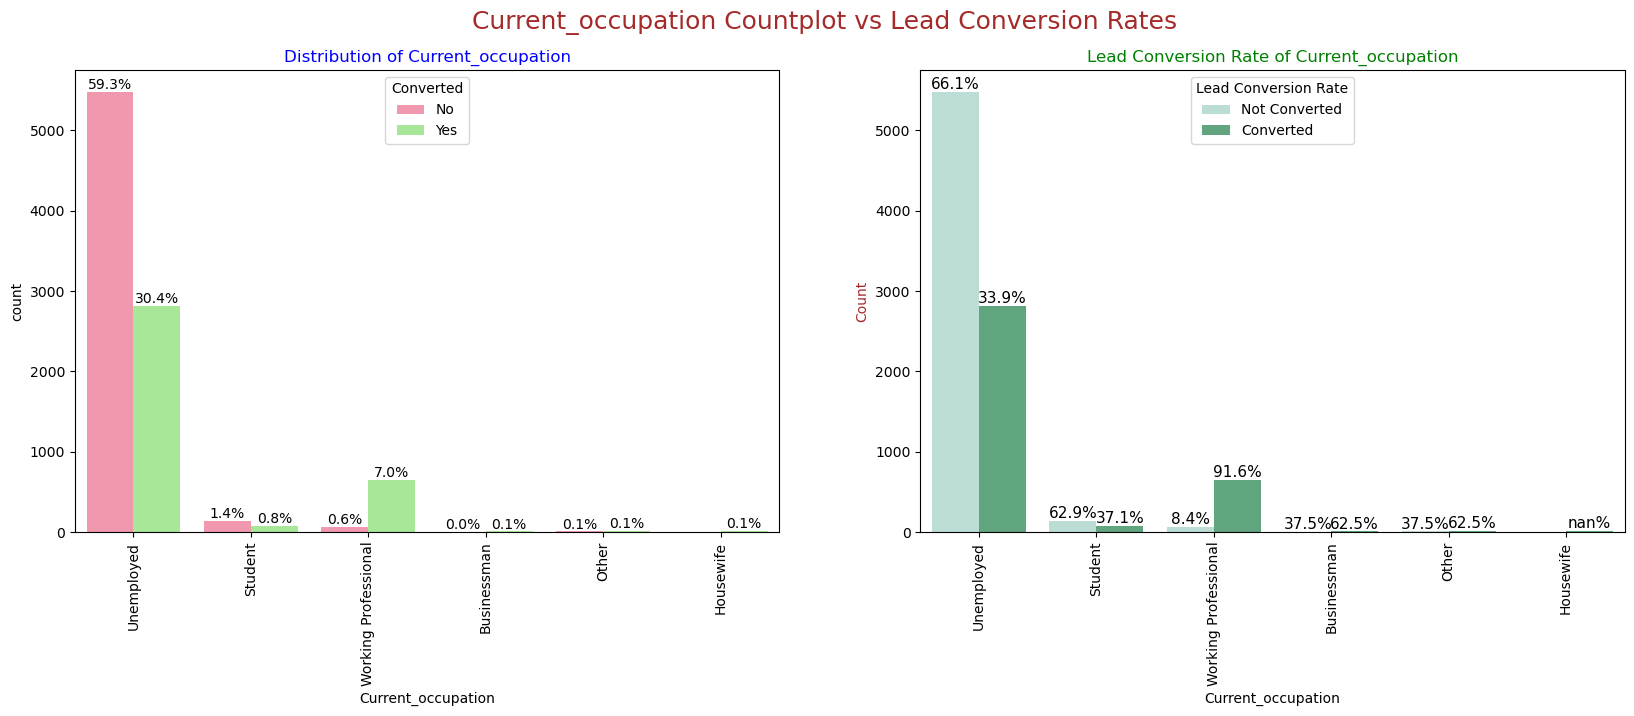

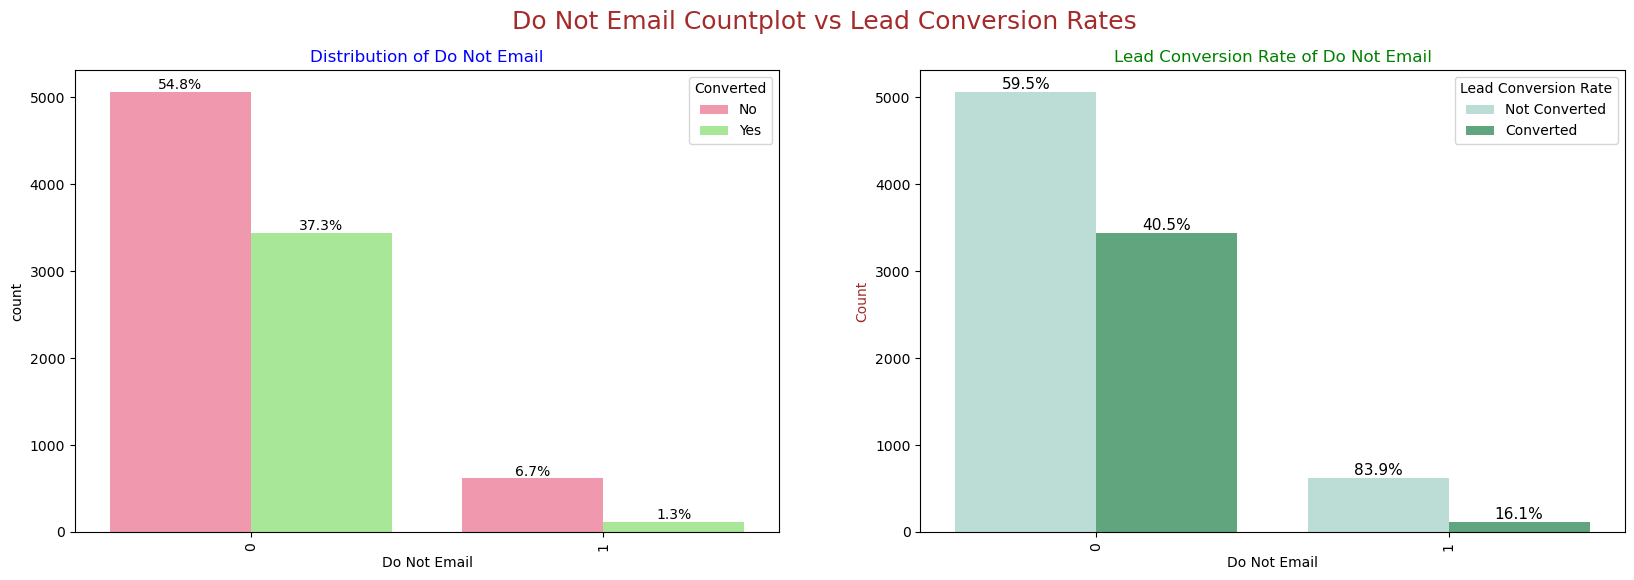

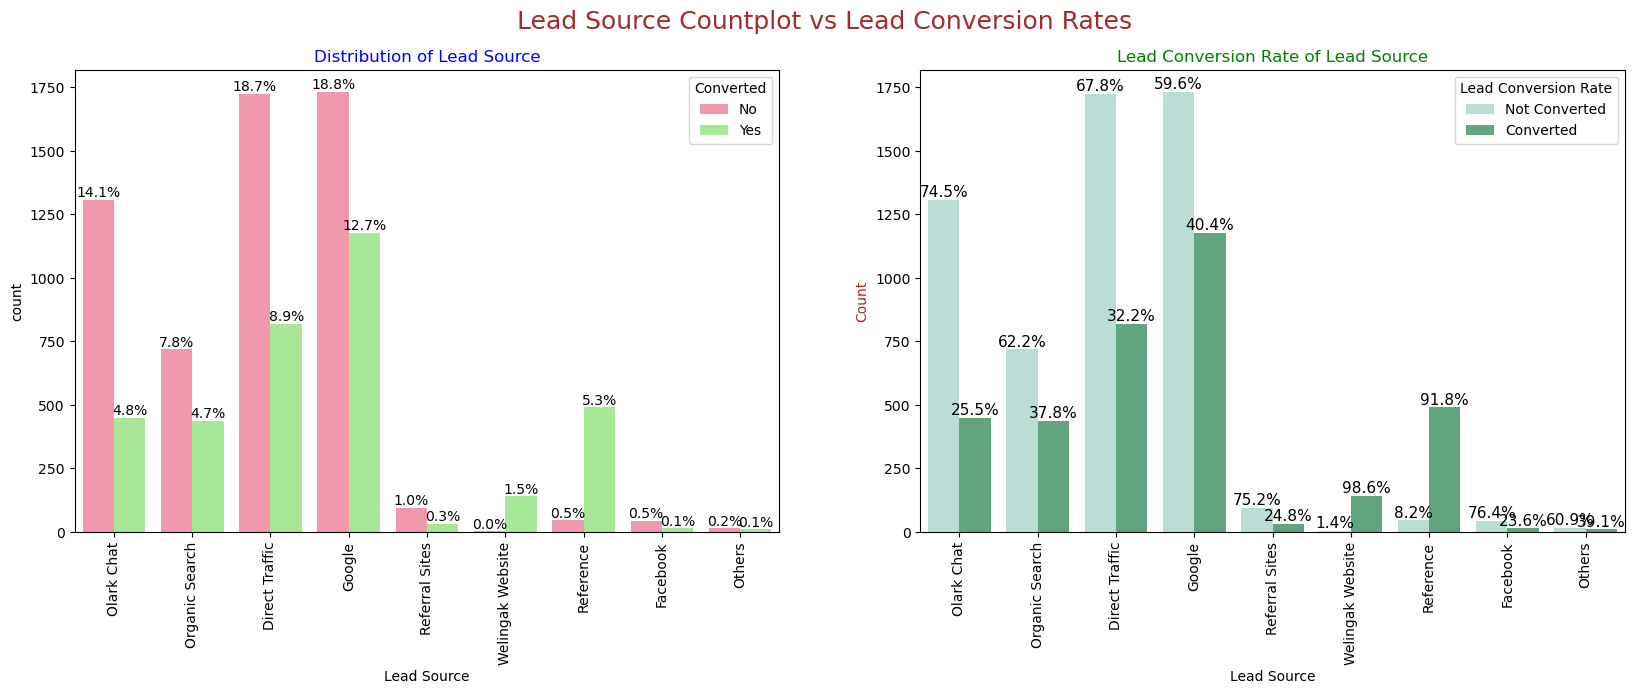

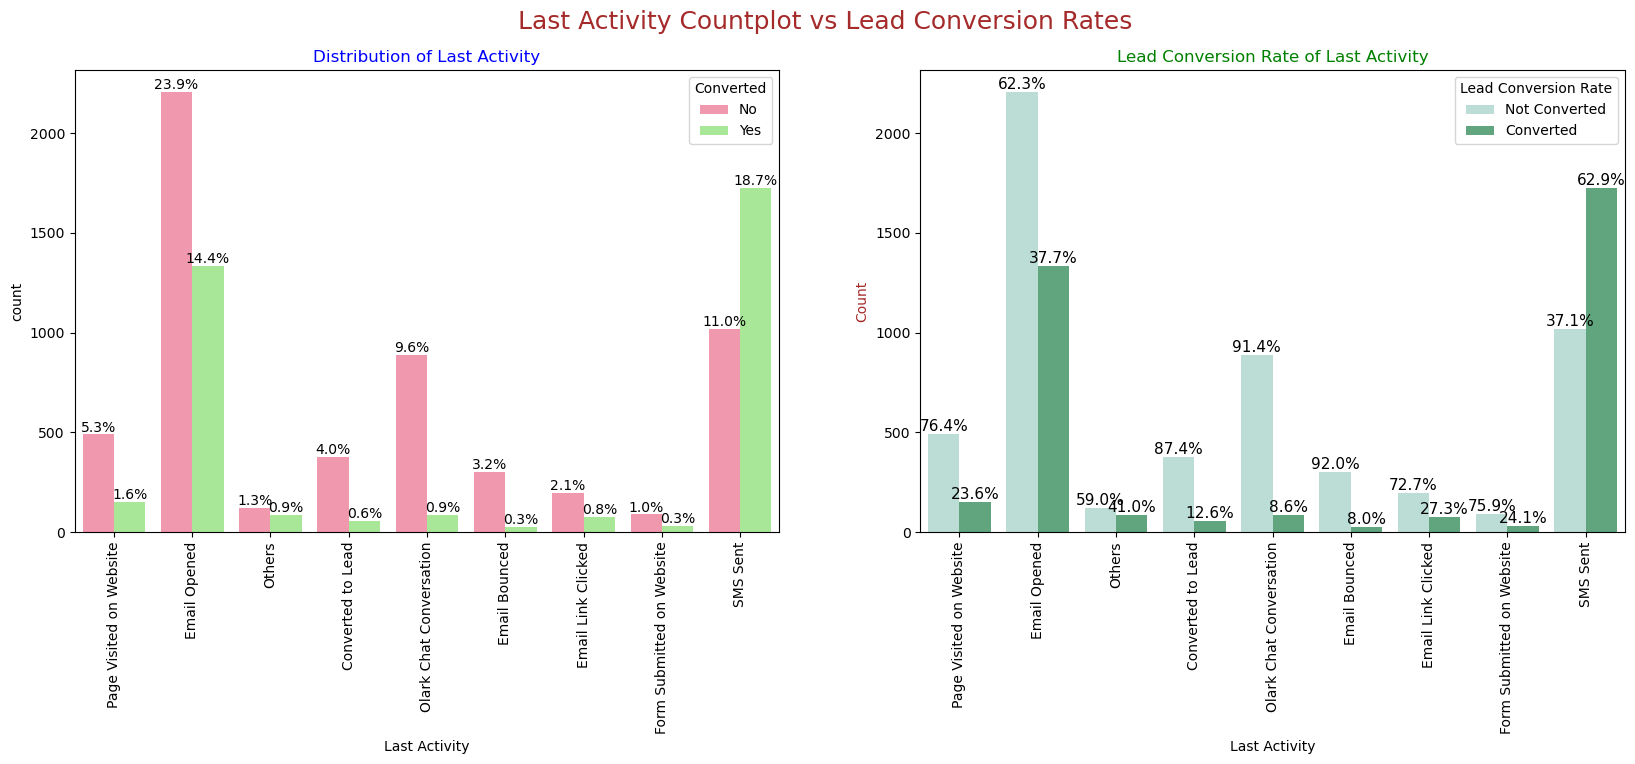

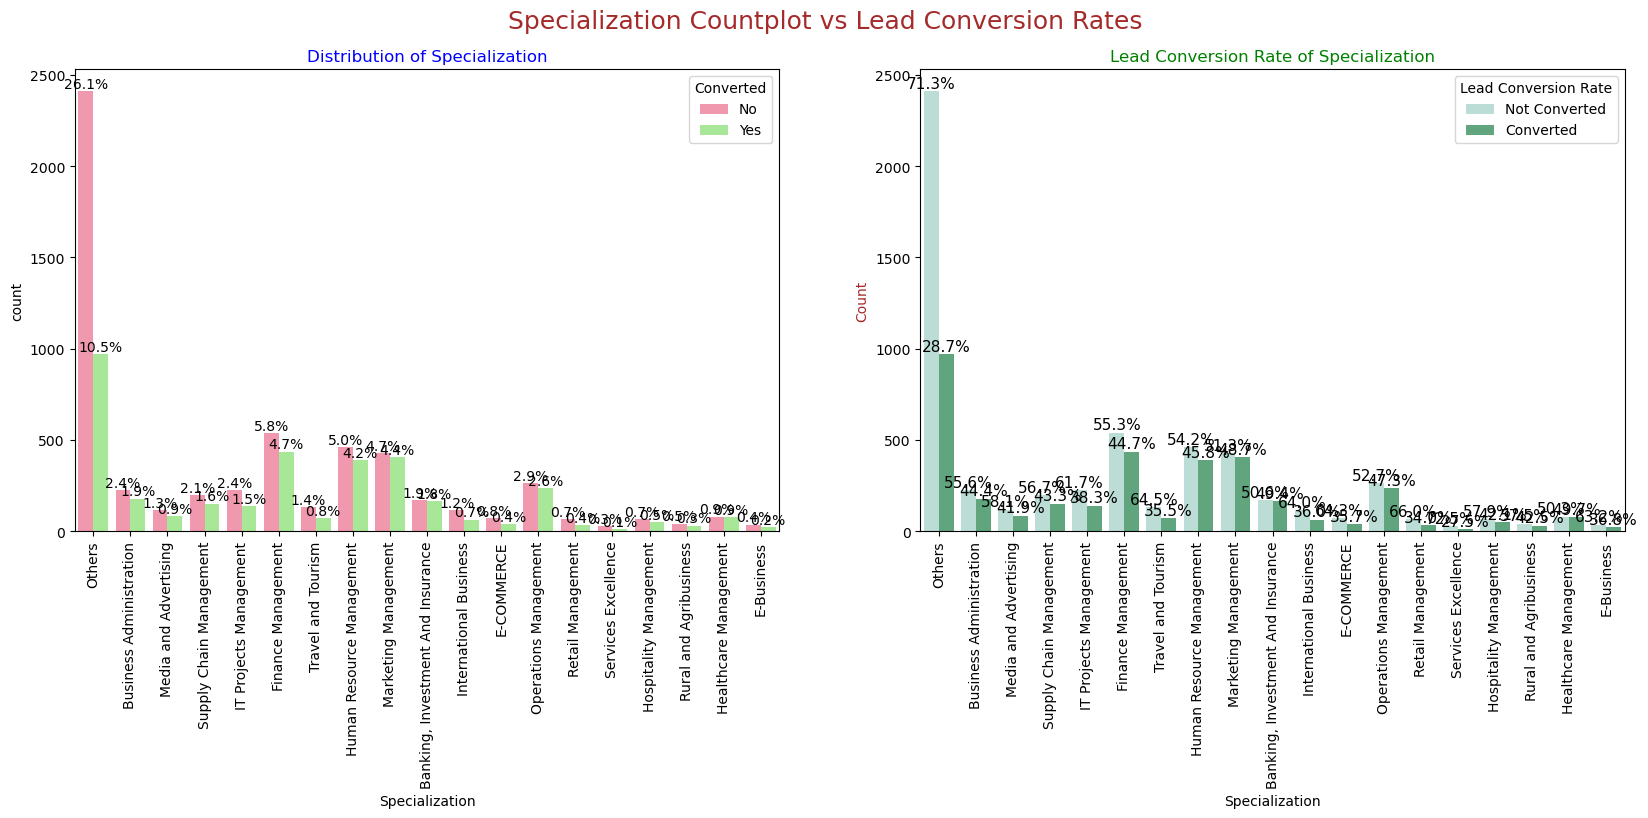

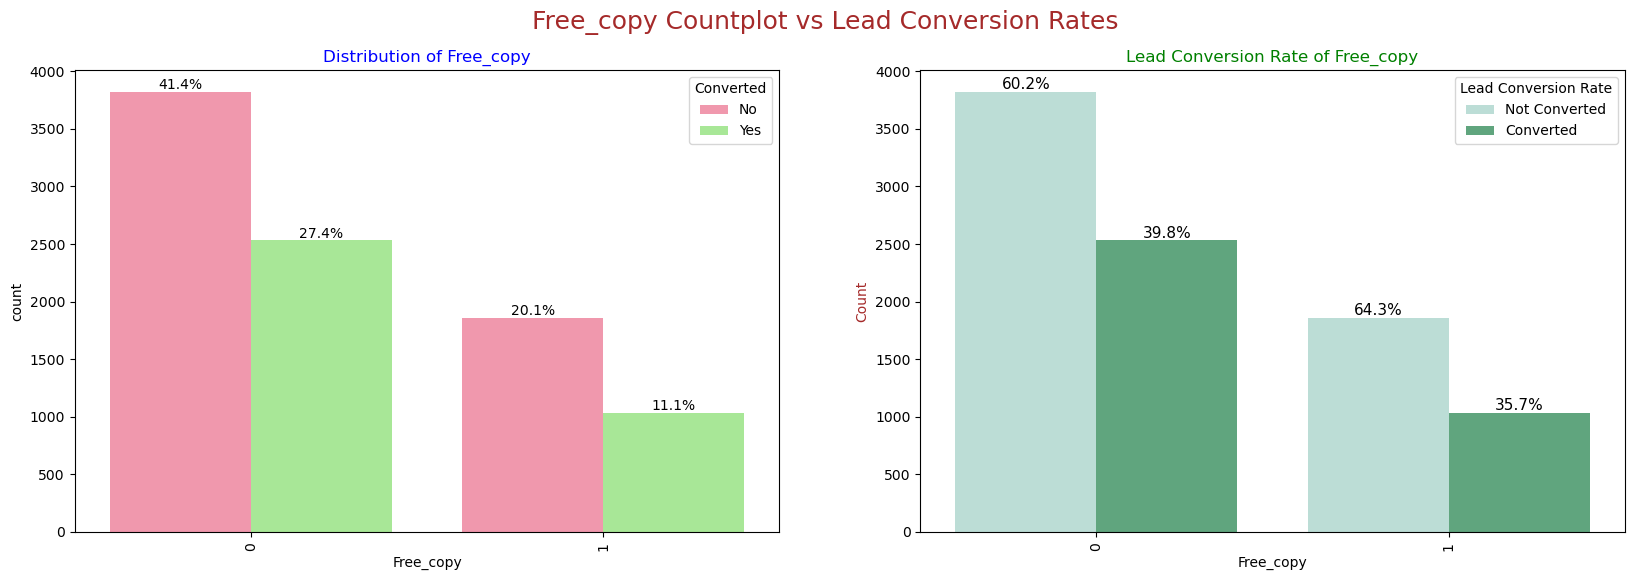

In [955]:
## Bivariate Analysis for all these variables using loop and UDF
## Comparision between variables w.r.t. 'Converted' (Target variable) , taking one categorical column w.r.t target variable as 'hue'
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Lead Source","Last Activity","Specialization","Free_copy"]

for i in cat_cols:
    Bivariate_cat(df_leads,variable_name=i)

#### Lead Origin: Around 52% of all leads originated from "Landing Page Submission" with a lead conversion rate (LCR) of 36%.The "API" identified approximately 39% of customers with a lead conversion rate (LCR) of 31%.

#### Current_occupation: Around 90% of the customers are Unemployed with lead conversion rate (LCR) of 34%. While Working Professional contribute only 7.6% of total customers with almost 92% lead conversion rate (LCR).

#### Do Not Email: 92% of the people has opted that they dont want to be emailed about the course.

#### Note: We have assumed LCR as Lead Conversion Rate

#### Lead Source: Google has LCR of 40% out of 31% customers , Direct Traffic contributes 32% LCR with 27% customers which is lower than Google,Organic Search also gives 37.8% of LCR but the contribution is by only 12.5% of customers ,Reference has LCR of 91% but there are only around 6% of customers through this Lead Source.

#### Last Activity: 'SMS Sent' has high lead conversion rate of 63% with 30% contribution from last activities, 'Email Opened' activity contributed 38% of last activities performed by the customers with 37% lead conversion rate.

#### Specialization: Marketing Managemt,HR Management,Finance Management shows good contribution.

### BIVARIATE ANALYSIS for numeric variables


<Figure size 1600x400 with 0 Axes>

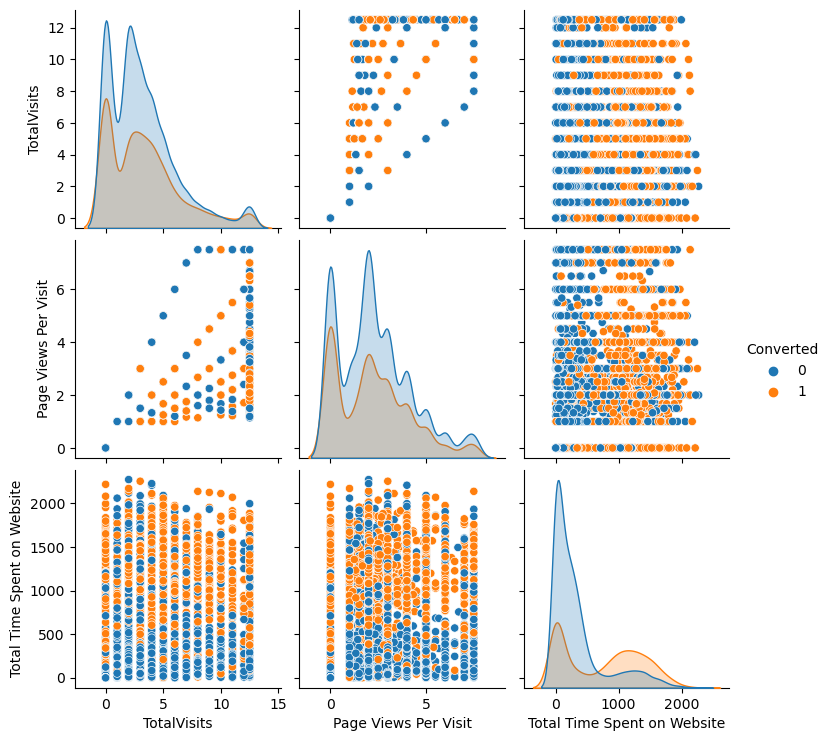

In [956]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=df_leads,vars=num_cols,hue="Converted")
plt.show()

In [957]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

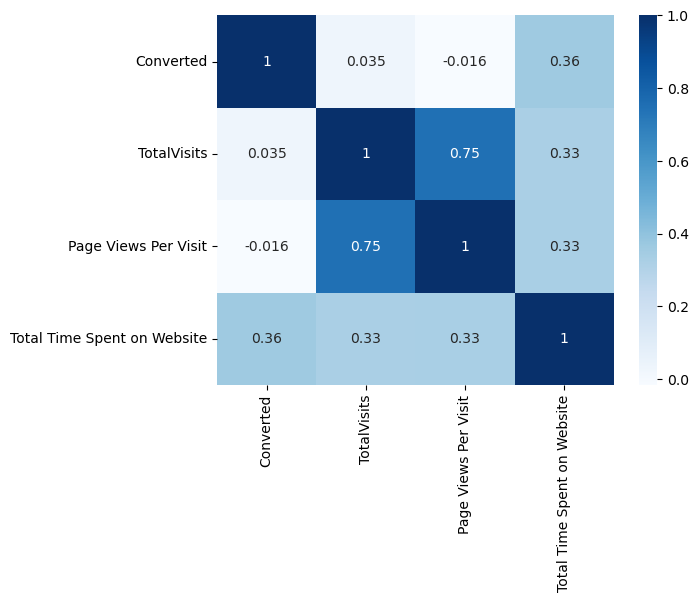

In [958]:
## Heatmap to show correlation between numerical variables
sns.heatmap(data=df_leads[num_cols].corr(),cmap="Blues",annot=True)
plt.show()

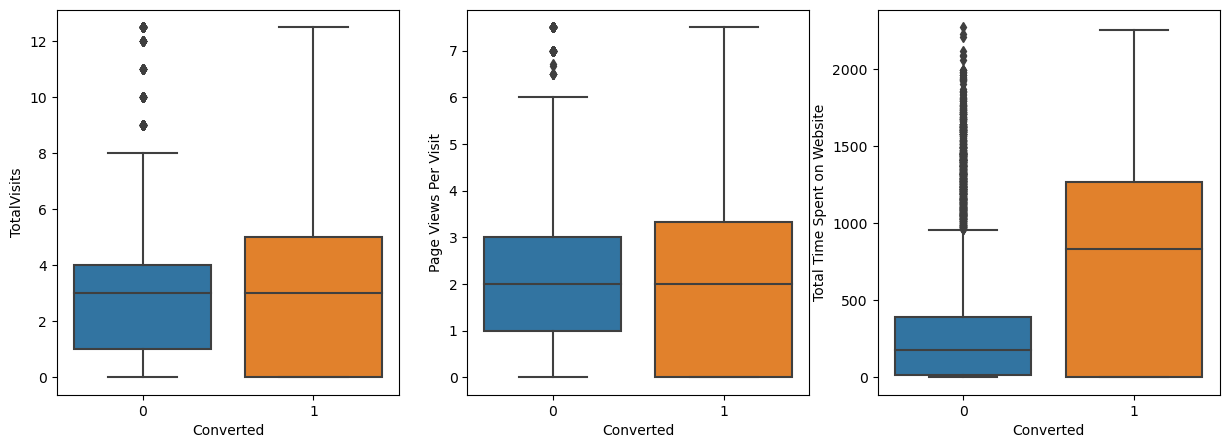

In [959]:
## Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_leads)
plt.show()

 Past Leads who spends more time on Website are successfully converted than those who spends less as seen in the boxplot

## Data Preparation
### Creation of dummy variables


In [960]:
df_leads.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0         0.00                            0                  0.00   
1          0         5.00                          674                  2.50   
2          1         2.00                         1532                  2.00   
3          0         1.00                          305                  1.00   
4          1         2.00                         1428                  1.00   

             Last Activity           Specialization Current_occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

   Free_copy  
0          0  
1          0  
2          1  
3          0  
4          0

In [961]:
## Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df_leads[["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"]], drop_first=True)

df_leads = pd.concat([df_leads, dummy], axis=1)

In [962]:
df_leads.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0         0.00                            0                  0.00   
1          0         5.00                          674                  2.50   
2          1         2.00                         1532                  2.00   
3          0         1.00                          305                  1.00   
4          1         2.00                         1428                  1.00   

             Last Activity           Specialization Current_occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

   Free_copy  Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0          0                                    0                          0   
1          0                                    0                          0   
2          1                                    1                          0   
3          0                                    1                          0   
4          0                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0 

In [963]:
### We have created dummies for the below variables, so we can drop them

df_leads = df_leads.drop(["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"],1)

In [964]:
df_leads.shape 

(9240, 50)

In [965]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 50 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               9240 non-null   int64  
 1   Do Not Email                              9240 non-null   int64  
 2   Converted                                 9240 non-null   int64  
 3   TotalVisits                               9240 non-null   float64
 4   Total Time Spent on Website               9240 non-null   int64  
 5   Page Views Per Visit                      9240 non-null   float64
 6   Free_copy                                 9240 non-null   int64  
 7   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 8   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 9   Lead Origin_Lead Import                   9240 non-null   uint8  
 10  Lead Origin_Quick Add Form          

### Test Train Split


In [966]:
## Putting predictor variables to X
X = df_leads.drop('Converted', axis=1)

## Putting Target variables to y
y = df_leads["Converted"]

In [967]:
## Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 49) 
y_train: (6468,)


In [968]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 49) 
y_test: (2772,)


### Feature Scaling


In [969]:
## using standard scaler for scaling the features
scaler = StandardScaler()

## fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [970]:
## X-train dataframe after standard scaling
X_train.head()

Lead Number  Do Not Email  TotalVisits  Total Time Spent on Website  \
1871         1.04         -0.29        -1.06                        -0.89   
6795        -0.83         -0.29         0.26                         0.01   
3516         0.41         -0.29         0.59                        -0.69   
8105        -1.25         -0.29         0.59                         1.37   
3934         0.22         -0.29        -1.06                        -0.89   

      Page Views Per Visit  Free_copy  Lead Origin_Landing Page Submission  \
1871                 -1.18      -0.67                                    0   
6795                 -0.49       1.49                                    1   
3516                  0.12      -0.67                                    0   
8105                  1.43      -0.67                                    1   
3934                 -1.18      -0.67                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
1871                          0                        0   
6795                          0                        0   
3516                          0                        0   
8105                          0                        0   
3934                          0                        0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
1871                           0                     0                   0   
6795                           0                     0                   0   
3516                           0                     0                   0   
8105                           0                     0                   1   
3934                           0                     0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
1871                       1                           0                   0   
6795                       0                           0                   0   
3516                       1                           0                   0   
8105                       0                           0                   0   
3934                       1                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  \
1871                      0                           0   
6795                      0                           0   
3516                      0                           0   
8105                      0                           0   
3934                      0                           0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
1871                             0                            0   
6795                             0                            0   
3516                             0                            0   
8105                             0                            0   
3934                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
1871                                 0                           1   
6795                                 0                           1   
3516                                 0                           1   
8105                                 0                           0   
3934                                 0                           1   

      Last Activity_Form Submitted on Website  \
1871                                        0   
6795                                        0   
3516                                        0   
8105                                        0   
3934                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
1871                                      0                     0   
6795                                      0                     0   
3516                                      0                     0   
8105         

In [971]:
## Checking the Lead Conversion Rate (LCR) - "Converted" is our Target Variable
## We will denote Lead Conversion Rate with 'LCR' as its short form

LCR = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
LCR

38.53896103896104

Conversion Rate : 38.58%
#### Let's look into corrrelations matrix

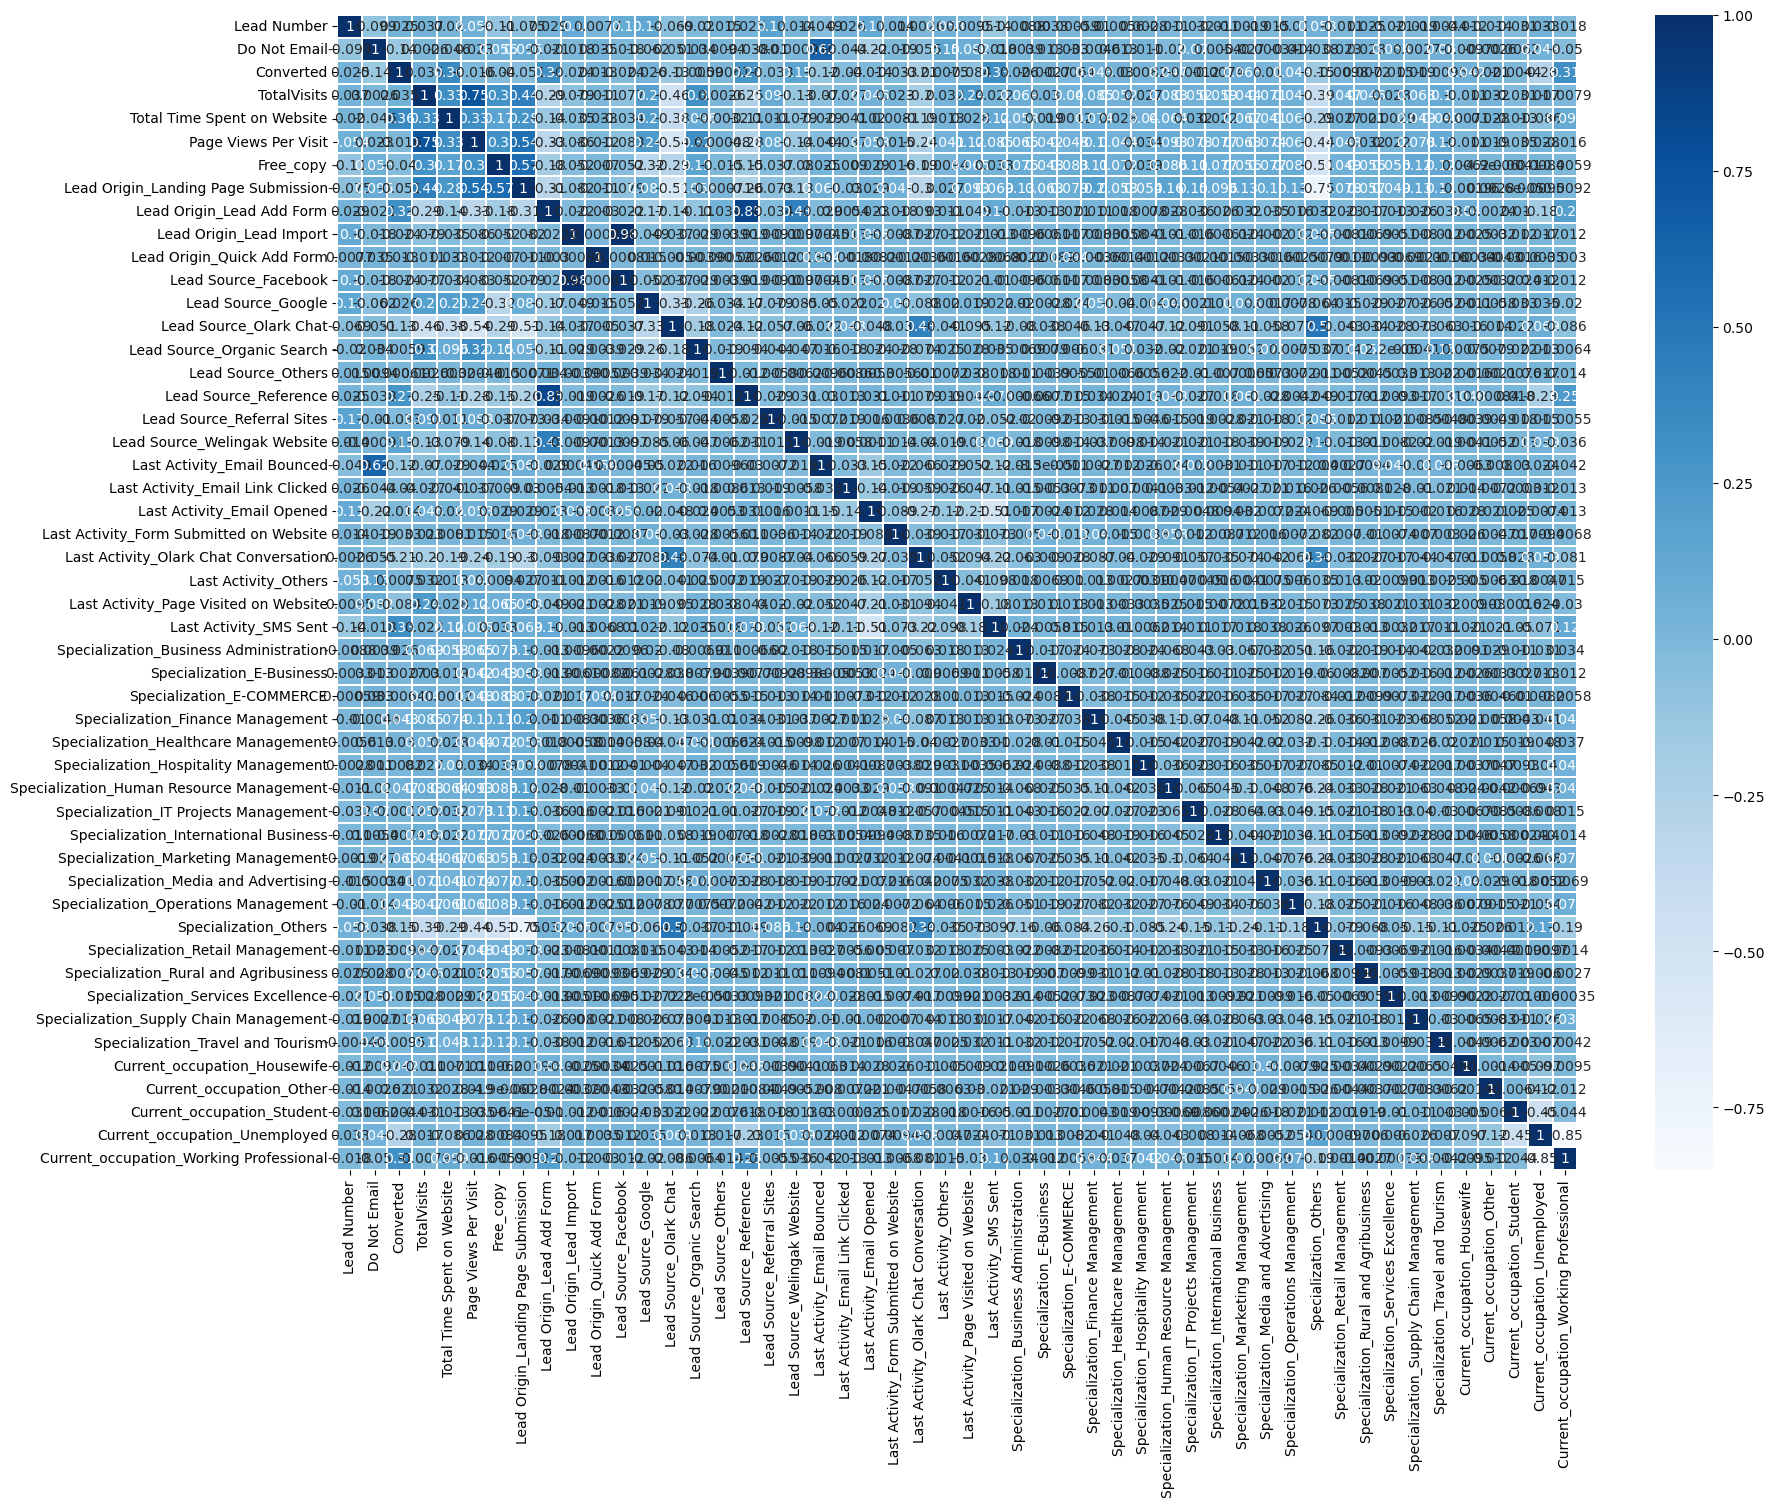

In [972]:
## analyse correlation matrix
plt.figure(figsize = (20,15))
sns.heatmap(df_leads.corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

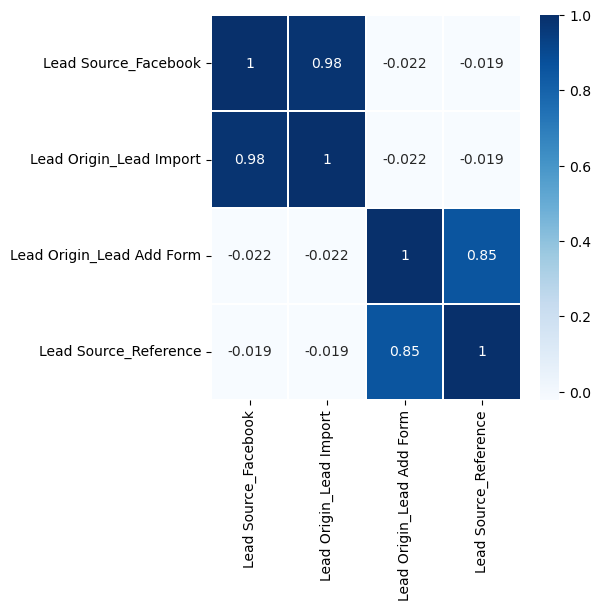

In [973]:
## as the above heatmap has so many columns lets breakdown suspected variables which migh have high correlation with each other
## analysing variables which might be highly correlated with each other from same class from above graph
plt.figure(figsize = (5,5))
sns.heatmap(df_leads[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

 #### These predictor variables above are very highly correlated with each other near diagonal with (0.98 and 0.85), it is better that we drop one of these variables from each pair as they won’t add much value to the model.
 #### So , we can drop any of them, lets drop 'Lead Origin_Lead Import' and 'Lead Origin_Lead Add Form'

In [974]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

## Model building
### Let's Build Logistic Regression Model for predicting categorical variable


In [975]:
## Lets use RFE to reduce variables
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [976]:
## Checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 14),
 ('Do Not Email', False, 11),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Free_copy', False, 20),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 16),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 28),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 31),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 13),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 22),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 25),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Busi

In [977]:
## instead of using as zip using this for more readablility

## Check the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

features  Feature Chosen  Ranking
23                    Last Activity_SMS Sent            True        1
42              Current_occupation_Housewife            True        1
36                     Specialization_Others            True        1
29     Specialization_Hospitality Management            True        1
21                      Last Activity_Others            True        1
20     Last Activity_Olark Chat Conversation            True        1
18                Last Activity_Email Opened            True        1
15              Lead Source_Welingak Website            True        1
13                     Lead Source_Reference            True        1
12                        Lead Source_Others            True        1
46   Current_occupation_Working Professional            True        1
8                       Lead Source_Facebook            True        1
6        Lead Origin_Landing Page Submission            True        1
3                Total Time Spent on Website            True        1
10                    Lead Source_Olark Chat            True        1
45             Current_occupation_Unemployed           False        2
43                  Current_occupation_Other           False        3
44                Current_occupation_Student           False        4
38     Specialization_Rural and Agribusiness           False        5
17          Last Activity_Email Link Clicked           False        6
32     Specialization_International Business           False        7
37          Specialization_Retail Management           False        8
2                                TotalVisits           False        9
4                       Page Views Per Visit           False       10
1                               Do Not Email           False       11
22     Last Activity_Page Visited on Website           False       12
14                Lead Source_Referral Sites           False       13
0                                Lead Number           False       14
24    Specialization_Business Administration           False       15
7                 Lead Origin_Quick Add Form           False       16
35      Specialization_Operations Management           False       17
33       Specialization_Marketing Management           False       18
30  Specialization_Human Resource Management           False       19
5                                  Free_copy           False       20
39        Specialization_Services Excellence           False       21
16               Last Activity_Email Bounced           False       22
40    Specialization_Supply Chain Management           False       23
31     Specialization_IT Projects Management           False       24
19   Last Activity_Form Submitted on Website           False       25
26                 Specialization_E-COMMERCE           False       26
28      Specialization_Healthcare Management           False       27
9                         Lead Source_Google           False       28
27         Specialization_Finance Management           False       29
25                 Specialization_E-Business           False       30
11                Lead Source_Organic Search           False       31
41         Specialization_Travel and Tourism           False       32
34      Specialization_Media and Advertising           False       33

In [978]:
## columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_occupation_Housewife',
       'Current_occupation_Working Professional'],
      dtype='object')

In [979]:
## columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Lead Number', 'Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'Free_copy', 'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Exce

In [980]:
## User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

#### Model 1 Building

In [981]:
# Building model using statsmodels, for the detailed statistics

# columns selected by RFE to be used for this model
rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()

logm1.params

const                                     -1.03
Total Time Spent on Website                1.05
Lead Origin_Landing Page Submission       -1.27
Lead Source_Facebook                      -0.70
Lead Source_Olark Chat                     0.90
Lead Source_Others                         0.98
Lead Source_Reference                      2.90
Lead Source_Welingak Website               5.38
Last Activity_Email Opened                 0.95
Last Activity_Olark Chat Conversation     -0.55
Last Activity_Others                       1.26
Last Activity_SMS Sent                     2.07
Specialization_Hospitality Management     -1.07
Specialization_Others                     -1.19
Current_occupation_Housewife              23.02
Current_occupation_Working Professional    2.69
dtype: float64

In [982]:
## Let's see the summary of our logistic regression model
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.8
Date:                Mon, 18 Sep 2023   Deviance:                       5465.5
Time:                        06:03:04   Pearson chi2:                 8.09e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

 "Current_occupation_Housewife" column will be removed from model due to high p-value of 0.999, which is above the accepted threshold of 0.05 for statistical significance.

#### Model 2 Building


In [983]:
# Dropping 'Current_occupation_Housewife' column
rfe_col=rfe_col.drop("Current_occupation_Housewife")

In [984]:
## Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()

logm2.params

const                                     -1.03
Total Time Spent on Website                1.05
Lead Origin_Landing Page Submission       -1.27
Lead Source_Facebook                      -0.70
Lead Source_Olark Chat                     0.90
Lead Source_Others                         0.97
Lead Source_Reference                      2.92
Lead Source_Welingak Website               5.38
Last Activity_Email Opened                 0.95
Last Activity_Olark Chat Conversation     -0.56
Last Activity_Others                       1.25
Last Activity_SMS Sent                     2.06
Specialization_Hospitality Management     -1.08
Specialization_Others                     -1.20
Current_occupation_Working Professional    2.68
dtype: float64

In [985]:
#Let's see the summary of our logistic regression model
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.3
Date:                Mon, 18 Sep 2023   Deviance:                       5480.7
Time:                        06:03:04   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3825
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

"Lead Source_Facebook" column will be removed from model due to high p-value of 0.187, which is above the accepted threshold of 0.05 for statistical significance.

#### Model 3 Building


In [986]:
## Dropping 'Lead Source_Facebook' column
rfe_col=rfe_col.drop("Lead Source_Facebook")

In [987]:
## Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()

logm3.params

const                                     -1.04
Total Time Spent on Website                1.05
Lead Origin_Landing Page Submission       -1.25
Lead Source_Olark Chat                     0.92
Lead Source_Others                         0.98
Lead Source_Reference                      2.94
Lead Source_Welingak Website               5.40
Last Activity_Email Opened                 0.94
Last Activity_Olark Chat Conversation     -0.56
Last Activity_Others                       1.25
Last Activity_SMS Sent                     2.06
Specialization_Hospitality Management     -1.09
Specialization_Others                     -1.19
Current_occupation_Working Professional    2.68
dtype: float64

In [988]:
## Let's see the summary of our logistic regression model
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Mon, 18 Sep 2023   Deviance:                       5482.6
Time:                        06:03:05   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

"Lead Source_Others" column will be removed from model due to high p-value of 0.055, which is above the accepted threshold of 0.05 for statistical significance.

#### Model 4 Building


In [989]:
## Dropping 'Lead Source_Others' column
rfe_col=rfe_col.drop("Lead Source_Others")

In [990]:
## Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()

logm4.params

const                                     -1.02
Total Time Spent on Website                1.05
Lead Origin_Landing Page Submission       -1.26
Lead Source_Olark Chat                     0.91
Lead Source_Reference                      2.93
Lead Source_Welingak Website               5.39
Last Activity_Email Opened                 0.94
Last Activity_Olark Chat Conversation     -0.56
Last Activity_Others                       1.25
Last Activity_SMS Sent                     2.05
Specialization_Hospitality Management     -1.09
Specialization_Others                     -1.20
Current_occupation_Working Professional    2.67
dtype: float64

In [991]:
## Let's see the summary of our logistic regression model
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.1
Date:                Mon, 18 Sep 2023   Deviance:                       5486.1
Time:                        06:03:05   Pearson chi2:                 8.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3819
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

#### Model 4 is stable and has significant p-values within the threshold (p-values < 0.05), so we will use it for further analysis.
#### Now lets check VIFs for these variables to check if there is any multicollinearity which exists among the independent variables

In [992]:
## Now checking VIFs for all variables in the Model 4
get_vif(X_train_rfe)

Features  VIF
0                     Specialization_Others 2.47
1       Lead Origin_Landing Page Submission 2.45
2                Last Activity_Email Opened 2.36
3                    Last Activity_SMS Sent 2.20
4                    Lead Source_Olark Chat 2.14
5     Last Activity_Olark Chat Conversation 1.72
6                     Lead Source_Reference 1.31
7               Total Time Spent on Website 1.24
8   Current_occupation_Working Professional 1.21
9              Lead Source_Welingak Website 1.08
10                     Last Activity_Others 1.08
11    Specialization_Hospitality Management 1.02

#### No variable needs to be dropped as they all have good VIF values less than 5.

#### p-values for all variables is less than 0.05
#### This model looks acceptable as everything is under control (p-values & VIFs).
#### So we will final our Model 4 for Model Evaluation.

## Model Evaluation

In [993]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = logm4.predict(sm.add_constant(X_train_rfe))
y_train_pred[:10]

1871   0.47
6795   0.07
3516   0.25
8105   0.77
3934   0.21
4844   0.99
3297   0.11
8071   1.00
987    0.17
7423   0.87
dtype: float64

In [994]:
params = logm4.params
print(len(params))

13


In [995]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.47408215, 0.07325161, 0.24908697, 0.7689732 , 0.2129729 ,
       0.9878074 , 0.1084541 , 0.99612765, 0.16925902, 0.86964073])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities


In [996]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final = pd.DataFrame({'Lead ID':y_train.index,'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Lead ID  Converted  Conversion_Prob
0     1871          0             0.47
1     6795          0             0.07
2     3516          0             0.25
3     8105          0             0.77
4     3934          0             0.21

#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [997]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Lead ID  Converted  Conversion_Prob  Predicted
0     1871          0             0.47          0
1     6795          0             0.07          0
2     3516          0             0.25          0
3     8105          0             0.77          1
4     3934          0             0.21          0

#### Now that we have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [998]:
# Training accuracy and confusion matrix
training_accuracy = accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
print(f"Training Accuracy: {training_accuracy:.2f}")

# Compute and print the confusion matrix
confusion =  metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print("Confusion Matrix:")
print(confusion)


Training Accuracy: 0.81
Confusion Matrix:
[[3588  414]
 [ 846 1620]]


In [999]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [1000]:
# Calculate the sensitivity

TP/(TP+FN)

0.656934306569343

In [1001]:
# Calculate the specificity

TN/(TN+FP)

0.896551724137931

### Finding the Optimal Cutoff

Now 0.05 was just arbitrary to loosely check the model performace. But in order to get good results, we need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [1002]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1003]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

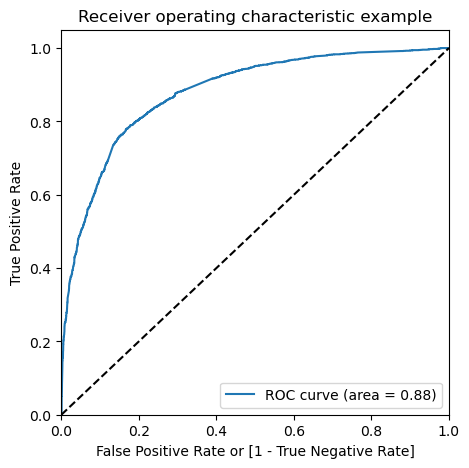

In [1004]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [1005]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Lead ID  Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  \
0     1871          0             0.47          0    1    1    1    1    1   
1     6795          0             0.07          0    1    0    0    0    0   
2     3516          0             0.25          0    1    1    1    0    0   
3     8105          0             0.77          1    1    1    1    1    1   
4     3934          0             0.21          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    0    0  
4    0    0    0    0    0

In [1006]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.38   1.00   0.00
0.10  0.10      0.60   0.97   0.36
0.20  0.20      0.72   0.92   0.60
0.30  0.30      0.79   0.83   0.77
0.40  0.40      0.81   0.76   0.84
0.50  0.50      0.81   0.66   0.90
0.60  0.60      0.79   0.59   0.92
0.70  0.70      0.78   0.51   0.95
0.80  0.80      0.75   0.41   0.97
0.90  0.90      0.71   0.25   0.99


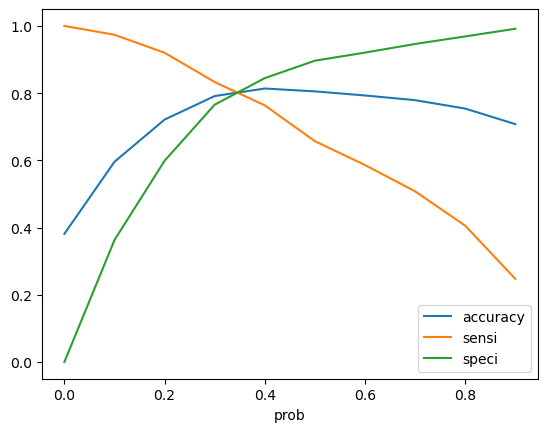

In [1007]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.35, you get the optimal values of the three metrics. So let's choose 0.35 as our cutoff now.

In [1008]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

Lead ID  Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  \
0     1871          0             0.47          0    1    1    1    1    1   
1     6795          0             0.07          0    1    0    0    0    0   
2     3516          0             0.25          0    1    1    1    0    0   
3     8105          0             0.77          1    1    1    1    1    1   
4     3934          0             0.21          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                1  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    1    1    1    0    0                1  
4    0    0    0    0    0                0

In [1009]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8056586270871985

In [1010]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3245,  757],
       [ 500, 1966]], dtype=int64)

In [1011]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1012]:
# Calculate Sensitivity

TP/(TP+FN)

0.797242497972425

In [1013]:
# Calculate Specificity

TN/(TN+FP)

0.8108445777111444

This cutoff point seems good to go!

## Making predictions on Test set

Now let's make predictions on the test set.

In [1014]:
### Feature Scaling
## using standard scaler for scaling the features

## fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# Scale the test set as well using just 'transform'

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

In [1015]:
# Select the columns in X_train for X_test as well

X_test = X_test[rfe_col]


In [1016]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[rfe_col])

In [1017]:
# Check X_test_sm

X_test_sm

const  Total Time Spent on Website  Lead Origin_Landing Page Submission  \
4269   1.00                         0.93                                    0   
2376   1.00                        -0.90                                    0   
7766   1.00                        -0.79                                    0   
9199   1.00                        -0.90                                    0   
4359   1.00                        -0.90                                    0   
9186   1.00                         0.21                                    1   
1631   1.00                         0.94                                    1   
8963   1.00                        -0.41                                    0   
8007   1.00                        -0.28                                    1   
5324   1.00                        -0.61                                    1   
2558   1.00                         1.26                                    0   
8973   1.00                        -0.69                                    1   
2935   1.00                         2.08                                    1   
2907   1.00                         2.04                                    1   
957    1.00                         0.08                                    1   
493    1.00                        -0.90                                    0   
3179   1.00                        -0.19                                    1   
3545   1.00                        -0.36                                    1   
6140   1.00                        -0.90                                    0   
4877   1.00                         1.18                                    1   
1734   1.00                         1.20                                    1   
5319   1.00                         1.27                                    1   
6208   1.00                         0.18                                    0   
3144   1.00                        -0.74                                    0   
1264   1.00                         1.92                                    0   
1557   1.00                         1.36                                    0   
5440   1.00                         1.73                                    0   
290    1.00                        -0.90                                    0   
4952   1.00                        -0.48                                    0   
1807   1.00                         2.94                                    0   
8899   1.00                         0.40                                    0   
8522   1.00                         1.75                                    1   
5255   1.00                         0.95                                    1   
8429   1.00                        -0.90                                    0   
2884   1.00                        -0.90                                    0   
2736   1.00                        -0.90                                    0   
8231   1.00                        -0.84                                    1   
2061   1.00                         0.90                                    0   
1275   1.00                         0.08                                    0   
7586   1.00                        -0.84                                    0   
1200   1.00                         2.43                                    0   
5034   1.00                         1.98                                    1   
7909   1.00                         1.52                                    0   
6874   1.00                         0.97                                    0   
8779   1.00                        -0.87                                    1   
937    1.00                         0.81                                    1   
2909   1.00                        -0.46                                    0   
4467   1.00                        -0.77                                    0   
2553   1.00                        -0

In [1018]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = logm4.predict(X_test_sm)
y_test_pred[:10]

4269   0.69
2376   0.86
7766   0.89
9199   0.06
4359   0.87
9186   0.50
1631   0.41
8963   0.15
8007   0.07
5324   0.29
dtype: float64

In [1019]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [1020]:
# Let's see the head

y_pred_1.head()

0
4269 0.69
2376 0.86
7766 0.89
9199 0.06
4359 0.87

In [1021]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [1022]:
# Putting Lead ID to index
y_test_df['Lead ID'] = y_test_df.index

In [1023]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1024]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1025]:
# Check 'y_pred_final'

y_pred_final.head()

Converted  Lead ID    0
0          1     4269 0.69
1          1     2376 0.86
2          1     7766 0.89
3          0     9199 0.06
4          1     4359 0.87

In [1026]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [1027]:
# Let's see the head of y_pred_final

y_pred_final.head()

Converted  Lead ID  Conversion_Prob
0          1     4269             0.69
1          1     2376             0.86
2          1     7766             0.89
3          0     9199             0.06
4          1     4359             0.87

In [1028]:
# Make predictions on the test set using 0.35 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [1029]:
# Check y_pred_final

y_pred_final.head()

Converted  Lead ID  Conversion_Prob  final_predicted
0          1     4269             0.69                1
1          1     2376             0.86                1
2          1     7766             0.89                1
3          0     9199             0.06                0
4          1     4359             0.87                1

In [1030]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8037518037518038

In [1031]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1365,  312],
       [ 232,  863]], dtype=int64)

In [1032]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1033]:
# Calculate sensitivity
TP / float(TP+FN)

0.7881278538812785

In [1034]:
# Calculate specificity
TN / float(TN+FP)

0.813953488372093

## Precision-Recall

Let's now also build the training model using the precision-recall view

In [1035]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3588,  414],
       [ 846, 1620]], dtype=int64)

##### Precision
TP / TP + FP

In [1036]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7964601769911505

##### Recall
TP / TP + FN

In [1037]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.656934306569343

### Precision and recall tradeoff

In [1038]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      1
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      1
 20      1
 21      1
 22      1
 23      1
 24      1
 25      1
 26      0
 27      1
 28      1
 29      0
 30      1
 31      0
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      0
 43      0
 44      0
 45      0
 46      1
 47      0
 48      0
 49      1
 50      0
 51      1
 52      1
 53      1
 54      1
 55      0
 56      1
 57      0
 58      1
 59      0
 60      0
 61      0
 62      1
 63      0
 64      1
 65      0
 66      1
 67      1
 68      0
 69      1
 70      1
 71      0
 72      1
 73      0
 74      0
 75      0
 76      1
 77      0
 78      0
 79      0
 80      0
 81      0
 82      0
 83      0
 84      0
 85      0
 86      0
 87      0
 88      1
 89      1
 90      1

In [1039]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

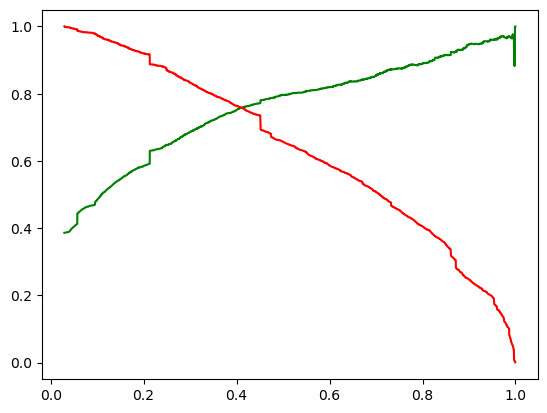

In [1040]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [1041]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

Lead ID  Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  \
0     1871          0             0.47          0    1    1    1    1    1   
1     6795          0             0.07          0    1    0    0    0    0   
2     3516          0             0.25          0    1    1    1    0    0   
3     8105          0             0.77          1    1    1    1    1    1   
4     3934          0             0.21          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                1  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    1    1    1    0    0                1  
4    0    0    0    0    0                0

In [1042]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8136982065553494

In [1043]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3380,  622],
       [ 583, 1883]], dtype=int64)

In [1044]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1045]:
# Calculate Precision

TP/(TP+FP)

0.7516966067864271

In [1046]:
# Calculate Recall

TP/(TP+FN)

0.7635847526358476

This cutoff point seems good to go!

## Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [1047]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = logm4.predict(X_test_sm)

In [1048]:
y_test_pred[:10]

4269   0.69
2376   0.86
7766   0.89
9199   0.06
4359   0.87
9186   0.50
1631   0.41
8963   0.15
8007   0.07
5324   0.29
dtype: float64

In [1049]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [1050]:
# Let's see the head

y_pred_1.head()

0
4269 0.69
2376 0.86
7766 0.89
9199 0.06
4359 0.87

In [1051]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [1052]:
# Putting Lead ID to index
y_test_df['Lead ID'] = y_test_df.index

In [1053]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1054]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1055]:
# Check 'y_pred_final'

y_pred_final.head()

Converted  Lead ID    0
0          1     4269 0.69
1          1     2376 0.86
2          1     7766 0.89
3          0     9199 0.06
4          1     4359 0.87

In [1056]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [1057]:
# Let's see the head of y_pred_final

y_pred_final.head()

Converted  Lead ID  Conversion_Prob
0          1     4269             0.69
1          1     2376             0.86
2          1     7766             0.89
3          0     9199             0.06
4          1     4359             0.87

In [1058]:
# Make predictions on the test set using 0.4 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [1059]:
# Check y_pred_final

y_pred_final.head()

Converted  Lead ID  Conversion_Prob  final_predicted
0          1     4269             0.69                1
1          1     2376             0.86                1
2          1     7766             0.89                1
3          0     9199             0.06                0
4          1     4359             0.87                1

In [1060]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8077200577200577

In [1061]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1420,  257],
       [ 276,  819]], dtype=int64)

In [1062]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1063]:
# Calculate Precision

TP/(TP+FP)

0.7611524163568774

In [1064]:
# Calculate Recall

TP/(TP+FN)

0.7479452054794521

## Assigning Lead Score
### Lead Score = 100 * ConversionProbability
#### This needs to be calculated for all the leads from the original dataset (train + test).

In [1065]:
# To select test set
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

Converted  Lead ID  Conversion_Prob  final_predicted
0          1     4269             0.69                1
1          1     2376             0.86                1
2          1     7766             0.89                1
3          0     9199             0.06                0
4          1     4359             0.87                1

In [1066]:
# To select train set
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

Lead ID  Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  \
0     1871          0             0.47          0    1    1    1    1    1   
1     6795          0             0.07          0    1    0    0    0    0   
2     3516          0             0.25          0    1    1    1    0    0   
3     8105          0             0.77          1    1    1    1    1    1   
4     3934          0             0.21          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                1  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    1    1    1    0    0                1  
4    0    0    0    0    0                0

In [1067]:
# To drop unnecessary columns from train set
leads_train_pred = leads_train_pred[['Lead ID','Converted','Conversion_Prob','final_predicted']]
leads_train_pred.head()

Lead ID  Converted  Conversion_Prob  final_predicted
0     1871          0             0.47                1
1     6795          0             0.07                0
2     3516          0             0.25                0
3     8105          0             0.77                1
4     3934          0             0.21                0

In [1068]:
# To concatenate 2 datasets
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

Lead ID  Converted  Conversion_Prob  final_predicted
0     1871          0             0.47                1
1     6795          0             0.07                0
2     3516          0             0.25                0
3     8105          0             0.77                1
4     3934          0             0.21                0

In [1069]:
# To inspect the shape of the final dataset
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)


(6468, 4)
(2772, 4)
(9240, 4)


In [1070]:
# To ensure uniqueness of Lead IDs
len(lead_full_pred['Lead ID'].unique().tolist())

9240

In [1071]:
# To calculate the Lead Score
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

Lead ID  Converted  Conversion_Prob  final_predicted  Lead_Score
0     1871          0             0.47                1          47
1     6795          0             0.07                0           7
2     3516          0             0.25                0          25
3     8105          0             0.77                1          77
4     3934          0             0.21                0          21

In [1072]:
# To make the Lead ID column as index
lead_full_pred = lead_full_pred.set_index('Lead ID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

Converted  Conversion_Prob  final_predicted  Lead_Score
Lead ID                                                         
0                0             0.09                0           9
1                0             0.29                0          29
2                1             0.66                1          66
3                0             0.20                0          20
4                1             0.16                0          16

In [1073]:
# To get Lead Number column from original data
leads_original = df_leads[['Lead Number']]
leads_original.head()

Lead Number
0       660737
1       660728
2       660727
3       660719
4       660681

In [1074]:
# reset the index to ensure uniqueness before concatenating
leads_original.reset_index(drop=True, inplace=True)
lead_full_pred.reset_index(drop=True, inplace=True)

# To concatenate the 2 dataframes based on index
leads_with_score = pd.concat([leads_original, lead_full_pred], axis=1)
leads_with_score.head()

Lead Number  Converted  Conversion_Prob  final_predicted  Lead_Score
0       660737          0             0.09                0           9
1       660728          0             0.29                0          29
2       660727          1             0.66                1          66
3       660719          0             0.20                0          20
4       660681          1             0.16                0          16

We have a new data frame consisting of Lead Number and Lead Score. Lead Number will help in easy referencing with the original data.



## Determing feature importance

In [1075]:
# To display features with corrsponding coefficients in final model
pd.options.display.float_format = '{:.2f}'.format
new_params = logm4.params[1:]
new_params

Total Time Spent on Website                1.05
Lead Origin_Landing Page Submission       -1.26
Lead Source_Olark Chat                     0.91
Lead Source_Reference                      2.93
Lead Source_Welingak Website               5.39
Last Activity_Email Opened                 0.94
Last Activity_Olark Chat Conversation     -0.56
Last Activity_Others                       1.25
Last Activity_SMS Sent                     2.05
Specialization_Hospitality Management     -1.09
Specialization_Others                     -1.20
Current_occupation_Working Professional    2.67
dtype: float64

In [1076]:
# Relative feature importance
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Total Time Spent on Website                19.48
Lead Origin_Landing Page Submission       -23.36
Lead Source_Olark Chat                     16.84
Lead Source_Reference                      54.29
Lead Source_Welingak Website              100.00
Last Activity_Email Opened                 17.48
Last Activity_Olark Chat Conversation     -10.31
Last Activity_Others                       23.25
Last Activity_SMS Sent                     38.08
Specialization_Hospitality Management     -20.31
Specialization_Others                     -22.33
Current_occupation_Working Professional    49.54
dtype: float64

In [1077]:
# To sort features based on importance
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Total Time Spent on Website                 1
Lead Origin_Landing Page Submission        10
Lead Source_Olark Chat                      9
Lead Source_Reference                       6
Lead Source_Welingak Website                2
Last Activity_Email Opened                  5
Last Activity_Olark Chat Conversation       0
Last Activity_Others                        7
Last Activity_SMS Sent                      8
Specialization_Hospitality Management      11
Specialization_Others                       3
Current_occupation_Working Professional     4
dtype: int64

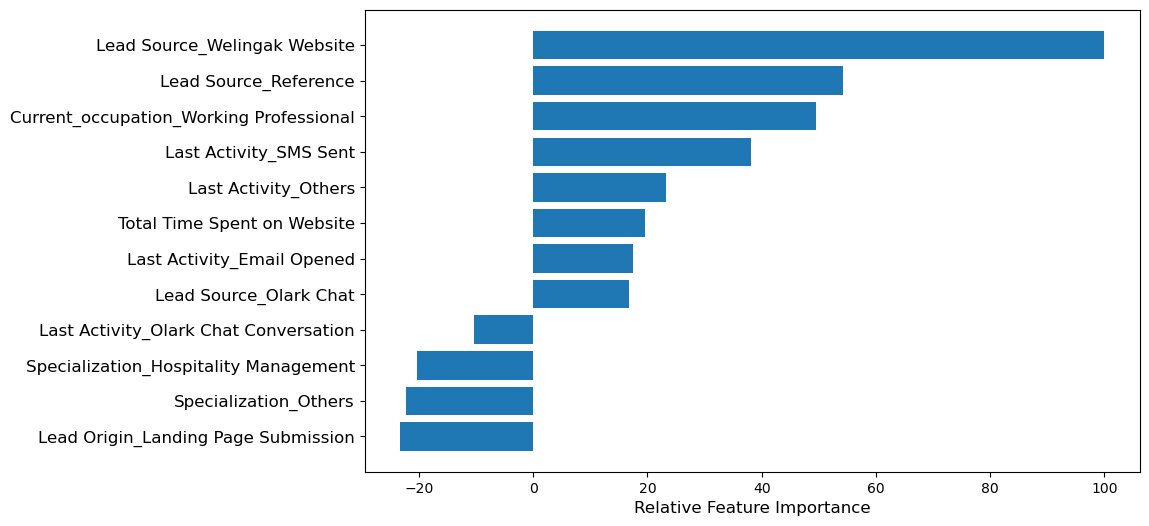

In [1078]:
# To plot features with their relative importance
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
pos = np.arange(sorted_idx.shape[0])
ax.barh(pos, feature_importance[sorted_idx])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[rfe_col].columns)[sorted_idx], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=12) 
plt.show()